In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('/Users/harendrakshirsagar/Downloads/Final1.csv')

# Preprocessing

df

In [4]:
df.columns

Index(['Timestamp', 'Age', 'Annual Income', 'Occupation', 'AccountBalance',
       'Credit Score(in range of 300,900)', 'Gender', 'Education',
       'Total Active loans', 'Bank Products ', 'Fixed Deposit ', 'Tenure',
       'Transaction in last Month', 'Networth', 'Married', 'Dependents'],
      dtype='object')

In [5]:
df['Bank Products '] = df['Bank Products '].apply(lambda x: len(x.split(',')))

In [6]:
df

,Timestamp,Age,Annual Income,Occupation,AccountBalance,"Credit Score(in range of 300,900)",Gender,Education,Total Active loans,Bank Products,Fixed Deposit,Tenure,Transaction in last Month,Networth,Married,Dependents
0,8/3/2024 13:09:04,45,500100,Salaried,50000,760,Male,Graduate,2,5,No,11,33,100000,NaN,2
1,8/3/2024 13:09:36,49,480000,Salaried,30000,750,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,8/3/2024 13:10:25,37,480000,Salaried,10000,710,Male,UnderGraduate,0,2,Yes,6,34,30000,yes,4
3,8/3/2024 13:11:20,21,240000,Salaried,5000,700,Male,UnderGraduate,1,2,No,2,25,650000,no,0
4,8/3/2024 13:12:50,42,35000,Housewife,12500,800,Female,Graduate,1,2,Yes,8,56,10000,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,8/3/2024 23:46:11,30,720000,Salaried,200000,750,Male,Post Graduate,1,6,Yes,14,61,400000,yes,2
97,8/3/2024 23:47:07,55,600000,Other,100000,789,Male,Under Graduate,2,3,No,19,24,3700000,yes,3
98,8/3/2024 23:48:22,28,120000,Housewife,20000,786,Female,Under Graduate,0,1,No,6,65,50599,yes,1
99,8/3/2024 23:49:15,54,240000,Other,5000,768,Female,Under Graduate,1,2,No,17,34,134000,yes,3


In [7]:
df.isnull().sum()

Timestamp                            0
Age                                  0
Annual Income                        0
Occupation                           0
AccountBalance                       0
Credit Score(in range of 300,900)    0
Gender                               0
Education                            0
Total Active loans                   0
Bank Products                        0
Fixed Deposit                        0
Tenure                               0
Transaction in last Month            0
Networth                             0
Married                              1
Dependents                           0
dtype: int64

In [8]:
df.rename(columns={'Bank Products ': 'Bank_Products', 'Fixed Deposit ': 'Fixed Deposit','Total Active loans':'Active_loans','Credit Score(in range of 300,900)':'credit_score','Transaction in last Month':'LastMonthTrans'}, inplace=True)
df

,Timestamp,Age,Annual Income,Occupation,AccountBalance,credit_score,Gender,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Married,Dependents
0,8/3/2024 13:09:04,45,500100,Salaried,50000,760,Male,Graduate,2,5,No,11,33,100000,NaN,2
1,8/3/2024 13:09:36,49,480000,Salaried,30000,750,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,8/3/2024 13:10:25,37,480000,Salaried,10000,710,Male,UnderGraduate,0,2,Yes,6,34,30000,yes,4
3,8/3/2024 13:11:20,21,240000,Salaried,5000,700,Male,UnderGraduate,1,2,No,2,25,650000,no,0
4,8/3/2024 13:12:50,42,35000,Housewife,12500,800,Female,Graduate,1,2,Yes,8,56,10000,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,8/3/2024 23:46:11,30,720000,Salaried,200000,750,Male,Post Graduate,1,6,Yes,14,61,400000,yes,2
97,8/3/2024 23:47:07,55,600000,Other,100000,789,Male,Under Graduate,2,3,No,19,24,3700000,yes,3
98,8/3/2024 23:48:22,28,120000,Housewife,20000,786,Female,Under Graduate,0,1,No,6,65,50599,yes,1
99,8/3/2024 23:49:15,54,240000,Other,5000,768,Female,Under Graduate,1,2,No,17,34,134000,yes,3


In [9]:
mode_status = df['Married'].mode()[0]

In [10]:
def handle_nulls(row):
    if pd.isnull(row['Married']) and row['Age'] > 25:
        return mode_status
    return row['Married']

In [11]:
df['Married'] = df.apply(handle_nulls, axis=1)

In [12]:

df.isnull().sum()

Timestamp         0
Age               0
Annual Income     0
Occupation        0
AccountBalance    0
credit_score      0
Gender            0
Education         0
Active_loans      0
Bank_Products     0
Fixed Deposit     0
Tenure            0
LastMonthTrans    0
Networth          0
Married           0
Dependents        0
dtype: int64

In [13]:
df=df.drop(columns='Timestamp',axis=1)

In [14]:
df.dtypes

Age                int64
Annual Income     object
Occupation        object
AccountBalance    object
credit_score       int64
Gender            object
Education         object
Active_loans       int64
Bank_Products      int64
Fixed Deposit     object
Tenure             int64
LastMonthTrans     int64
Networth           int64
Married           object
Dependents         int64
dtype: object

In [15]:
df['Annual Income'] = df['Annual Income'].astype(str).str.replace(',', '').astype(int)


In [16]:
df['AccountBalance'] = df['AccountBalance'].str.replace(',', '').astype(int)

In [17]:
describe_df=df.describe()

In [18]:
df.dtypes

Age                int64
Annual Income      int64
Occupation        object
AccountBalance     int64
credit_score       int64
Gender            object
Education         object
Active_loans       int64
Bank_Products      int64
Fixed Deposit     object
Tenure             int64
LastMonthTrans     int64
Networth           int64
Married           object
Dependents         int64
dtype: object

In [19]:
columns_to_format = ['Active_loans', 'Networth','Annual Income','AccountBalance']
for col in columns_to_format:
    if describe_df[col].dtype in ['float64', 'int64']:
        describe_df[col] = describe_df[col].apply(lambda x: f'{x:.6f}')

In [20]:
describe_df

,Age,Annual Income,AccountBalance,credit_score,Active_loans,Bank_Products,Tenure,LastMonthTrans,Networth,Dependents
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,38.564356,634443.346535,257249.663366,3095.108911,50892.287129,2.257426,10.207921,37.435644,2432065.990099,2.782178
std,13.512524,871796.238312,501313.827542,18492.773054,360971.016656,1.205433,7.714035,17.408283,3563726.905744,1.847181
min,18.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000
25%,27.000000,240000.000000,10000.000000,546.000000,0.000000,1.000000,4.000000,24.000000,600050.000000,2.000000
50%,38.000000,500000.000000,70000.000000,700.000000,1.000000,2.000000,9.000000,36.000000,1600000.000000,3.000000
75%,49.000000,780000.000000,200000.000000,765.000000,2.000000,3.000000,15.000000,51.000000,3100000.000000,4.000000
max,75.000000,7500000.000000,3000000.000000,180000.000000,3400000.000000,6.000000,40.000000,70.000000,30000000.000000,8.000000


# Age 

In [21]:
df['Age'].mean()

38.56435643564357

In [22]:
df['Age'].describe()

count    101.000000
mean      38.564356
std       13.512524
min       18.000000
25%       27.000000
50%       38.000000
75%       49.000000
max       75.000000
Name: Age, dtype: float64

<Axes: >

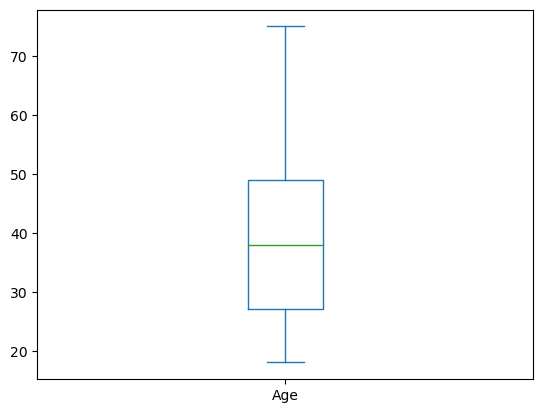

In [23]:
df['Age'].plot(kind='box')

<Axes: ylabel='Frequency'>

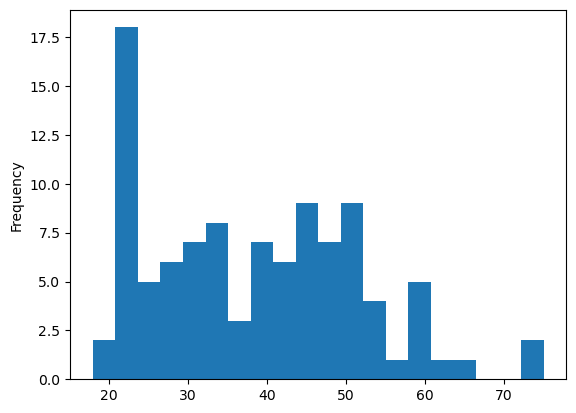

In [24]:
df['Age'].plot(kind='hist',bins=20)

In [25]:
df['Age'].value_counts()


Age
21    12
45     5
50     5
40     5
28     4
60     4
49     4
22     4
30     4
51     3
42     3
46     3
35     3
33     3
43     2
48     2
34     2
55     2
75     2
38     2
31     2
25     2
26     2
23     2
54     2
37     2
29     1
32     1
44     1
27     1
56     1
41     1
24     1
63     1
36     1
47     1
65     1
18     1
52     1
59     1
20     1
Name: count, dtype: int64

In [26]:
df['Annual Income'].mean()

634443.3465346535

/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_1150/2509096820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=6)


<Axes: xlabel='Age', ylabel='Density'>

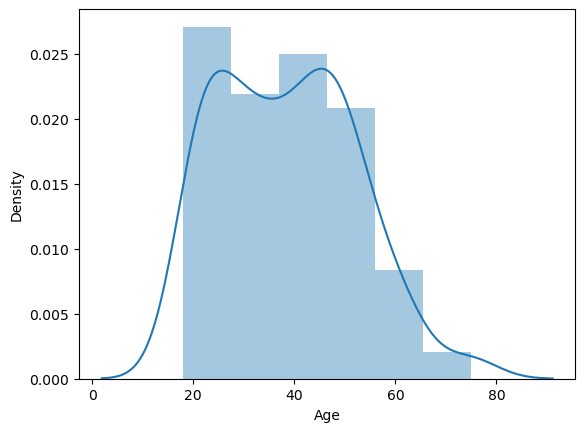

In [27]:
sns.distplot(df['Age'],bins=6)

# Occupation

In [28]:
df['Occupation'].value_counts()

Occupation
Salaried           42
Other              30
Business           21
Housewife           7
Salaried, Other     1
Name: count, dtype: int64

In [29]:
df['Occupation'] = df['Occupation'].replace('Salaried ', 'Salaried')

In [30]:
df['Occupation'].value_counts()

Occupation
Salaried           42
Other              30
Business           21
Housewife           7
Salaried, Other     1
Name: count, dtype: int64

In [31]:
df['Occupation']

0       Salaried
1       Salaried
2       Salaried
3       Salaried
4      Housewife
         ...    
96      Salaried
97         Other
98     Housewife
99         Other
100        Other
Name: Occupation, Length: 101, dtype: object

In [32]:
# Find rows where 'Occupation' is 'Salaried, Other'
rows_with_salaried_other = df[df['Occupation'] == 'Salaried, Other']

# Display the result
print(rows_with_salaried_other)

    Age  Annual Income       Occupation  AccountBalance  credit_score Gender  \
30   75          24000  Salaried, Other         3000000             0   Male   

   Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
30  Graduate             0              2            No      40   

    LastMonthTrans  Networth Married  Dependents  
30              35   5043455     yes           5  


In [33]:
df.head(34)

,Age,Annual Income,Occupation,AccountBalance,credit_score,Gender,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Married,Dependents
0,45,500100,Salaried,50000,760,Male,Graduate,2,5,No,11,33,100000,yes,2
1,49,480000,Salaried,30000,750,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,37,480000,Salaried,10000,710,Male,UnderGraduate,0,2,Yes,6,34,30000,yes,4
3,21,240000,Salaried,5000,700,Male,UnderGraduate,1,2,No,2,25,650000,no,0
4,42,35000,Housewife,12500,800,Female,Graduate,1,2,Yes,8,56,10000,yes,3
5,37,100000,Business,200000,800,Female,Graduate,3,5,Yes,10,32,5000000,yes,4
6,54,480000,Business,100000,750,Male,UnderGraduate,0,1,No,11,45,4000900,yes,5
7,49,1230000,Salaried,120000,720,Male,Graduate,1200000,3,No,14,58,8700500,yes,3
8,21,300000,Other,5000,740,Male,UnderGraduate,2,4,Yes,3,12,1400000,no,0
9,21,0,Other,8000,850,Male,Under Graduate,3,2,No,2,29,14050,no,0


In [34]:
df['Occupation'] = df['Occupation'].replace('Salaried, Other', 'Other')

In [35]:
df

,Age,Annual Income,Occupation,AccountBalance,credit_score,Gender,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Married,Dependents
0,45,500100,Salaried,50000,760,Male,Graduate,2,5,No,11,33,100000,yes,2
1,49,480000,Salaried,30000,750,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,37,480000,Salaried,10000,710,Male,UnderGraduate,0,2,Yes,6,34,30000,yes,4
3,21,240000,Salaried,5000,700,Male,UnderGraduate,1,2,No,2,25,650000,no,0
4,42,35000,Housewife,12500,800,Female,Graduate,1,2,Yes,8,56,10000,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,Salaried,200000,750,Male,Post Graduate,1,6,Yes,14,61,400000,yes,2
97,55,600000,Other,100000,789,Male,Under Graduate,2,3,No,19,24,3700000,yes,3
98,28,120000,Housewife,20000,786,Female,Under Graduate,0,1,No,6,65,50599,yes,1
99,54,240000,Other,5000,768,Female,Under Graduate,1,2,No,17,34,134000,yes,3


In [36]:
df['Occupation'].value_counts()

Occupation
Salaried     42
Other        31
Business     21
Housewife     7
Name: count, dtype: int64

<Axes: xlabel='Occupation'>

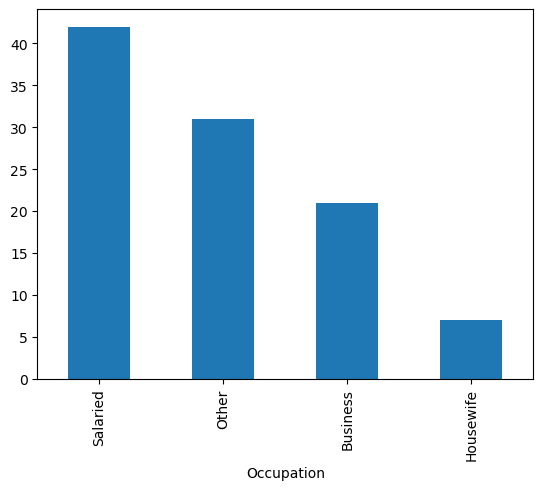

In [37]:
df['Occupation'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

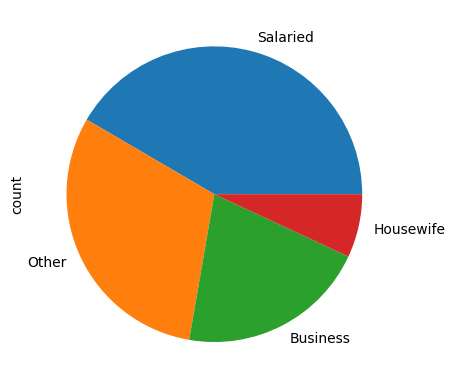

In [38]:
df['Occupation'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

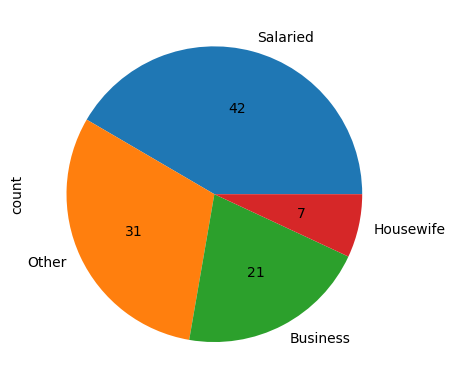

In [39]:
df['Occupation'].value_counts().plot(kind='pie',autopct='%.f')

# MaritalStatus

# Gender	

In [40]:
df['Gender'].value_counts()

Gender
Male       72
Female     28
Female      1
Name: count, dtype: int64

In [41]:
df['Gender'] = df['Gender'].replace('Female ', 'Female')

In [42]:
df['Gender'].value_counts()

Gender
Male      72
Female    29
Name: count, dtype: int64

<Axes: xlabel='Gender'>

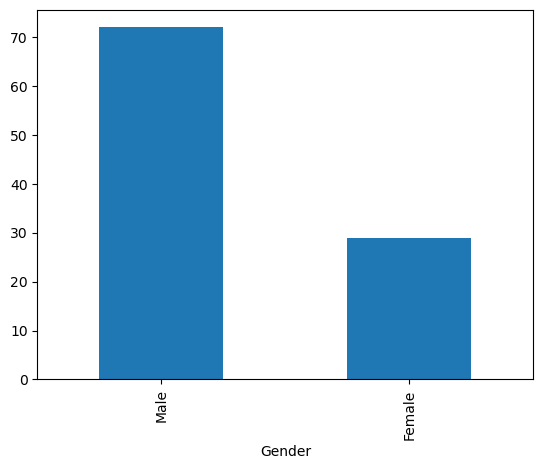

In [43]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

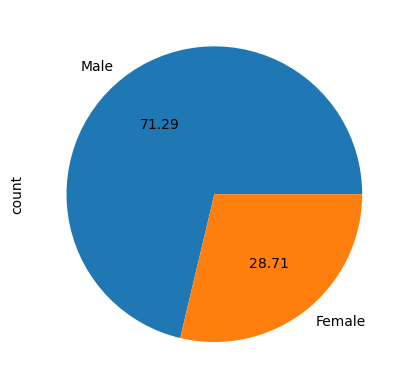

In [44]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [45]:
df

,Age,Annual Income,Occupation,AccountBalance,credit_score,Gender,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Married,Dependents
0,45,500100,Salaried,50000,760,Male,Graduate,2,5,No,11,33,100000,yes,2
1,49,480000,Salaried,30000,750,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,37,480000,Salaried,10000,710,Male,UnderGraduate,0,2,Yes,6,34,30000,yes,4
3,21,240000,Salaried,5000,700,Male,UnderGraduate,1,2,No,2,25,650000,no,0
4,42,35000,Housewife,12500,800,Female,Graduate,1,2,Yes,8,56,10000,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,Salaried,200000,750,Male,Post Graduate,1,6,Yes,14,61,400000,yes,2
97,55,600000,Other,100000,789,Male,Under Graduate,2,3,No,19,24,3700000,yes,3
98,28,120000,Housewife,20000,786,Female,Under Graduate,0,1,No,6,65,50599,yes,1
99,54,240000,Other,5000,768,Female,Under Graduate,1,2,No,17,34,134000,yes,3


# Married

In [46]:
df['Married'].value_counts()

Married
yes    77
no     24
Name: count, dtype: int64

<Axes: xlabel='Married'>

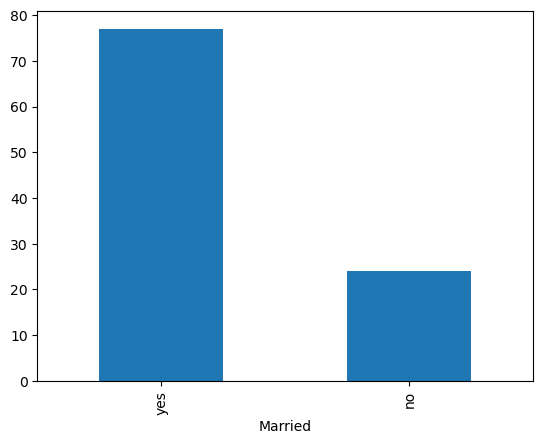

In [47]:
df['Married'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

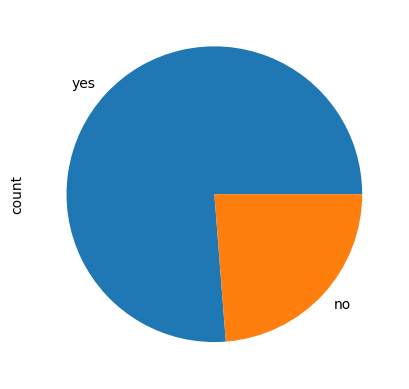

In [48]:
df['Married'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

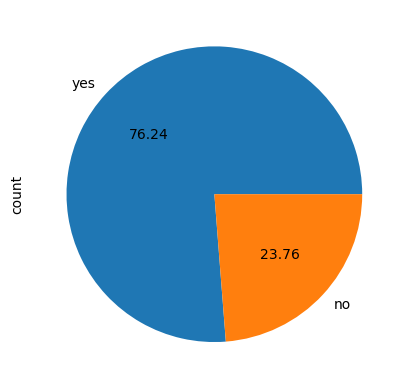

In [49]:
df['Married'].value_counts().plot(kind='pie',autopct='%.2f')

# Education

In [50]:
df['Education'].value_counts()

Education
Graduate          41
Under Graduate    39
Post Graduate     16
UnderGraduate      4
Graduate           1
Name: count, dtype: int64

In [51]:
df['Education'] = df['Education'].replace('Graduate ', 'Graduate')
df['Education'] = df['Education'].replace('UnderGraduate', 'Under Graduate')

In [52]:
df['Education'].value_counts()


Education
Under Graduate    43
Graduate          42
Post Graduate     16
Name: count, dtype: int64

<Axes: xlabel='Education'>

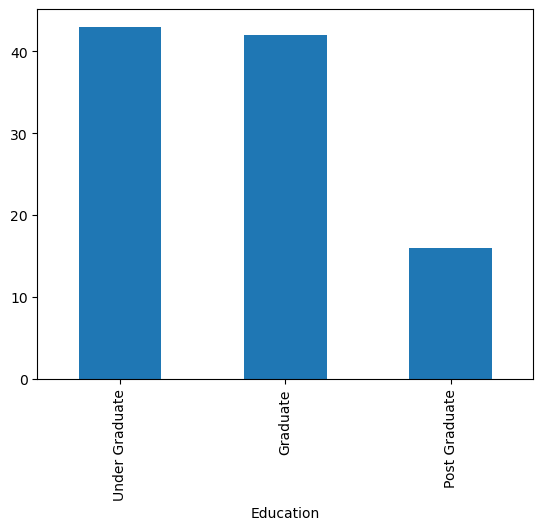

In [53]:
df['Education'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

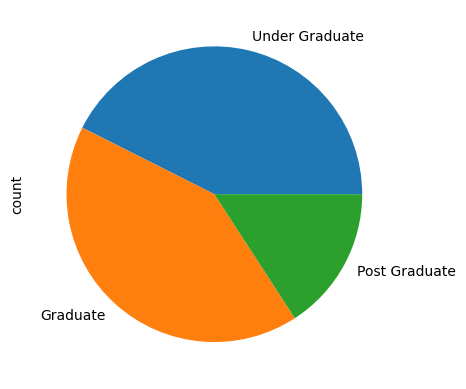

In [54]:
df['Education'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

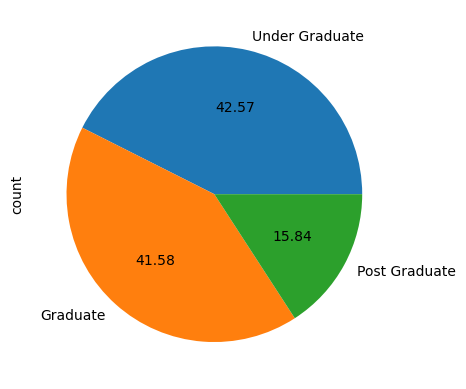

In [55]:
df['Education'].value_counts().plot(kind='pie',autopct='%.2f')

# Active_loans	

In [56]:
df['Active_loans'].value_counts()

Active_loans
0          39
2          26
1          20
3          10
1200000     1
540000      1
10          1
4           1
5           1
3400000     1
Name: count, dtype: int64

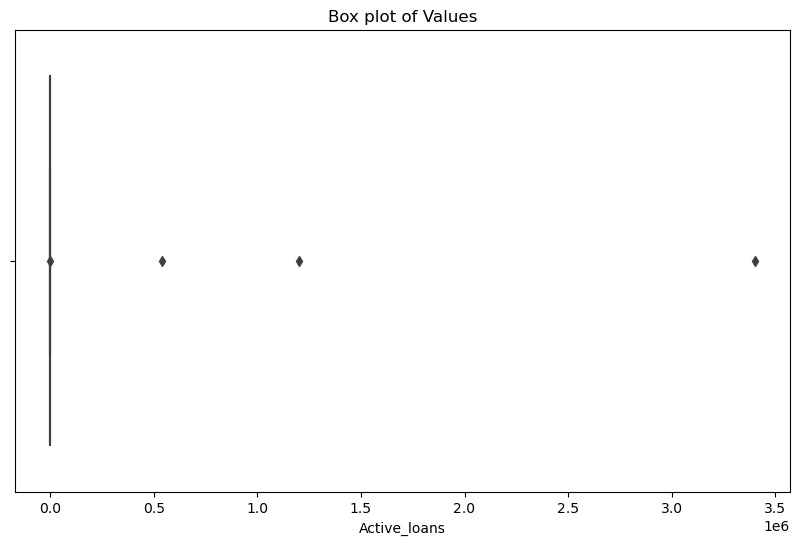

In [57]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Active_loans'])
plt.title('Box plot of Values')
plt.show()


In [58]:
df.shape

(101, 15)

In [59]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Active_loans'].quantile(0.25)
Q3 = df['Active_loans'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Active_loans'] < lower_bound) | (df['Active_loans'] > upper_bound)]

print("Outliers:\n", outliers)


Outliers:
     Age  Annual Income Occupation  AccountBalance  credit_score Gender  \
7    49        1230000   Salaried          120000           720   Male   
23   42         840000   Business          120000           798   Male   
52   21         340000      Other             100           700   Male   
79   30         800000   Salaried           10000           851   Male   

         Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
7         Graduate       1200000              3            No      14   
23  Under Graduate        540000              5           Yes      16   
52  Under Graduate            10              2            No       2   
79        Graduate       3400000              1           Yes       6   

    LastMonthTrans  Networth Married  Dependents  
7               58   8700500     yes           3  
23              54    900000     yes           4  
52              13    560000      no           0  
79              49   1000000     yes           3

In [60]:
mode_value = df['Active_loans'].mode()[0]


In [61]:
def replace_outliers(series, lower_bound, upper_bound, mode_value):
    return np.where((series < lower_bound) | (series > upper_bound), mode_value, series)


In [62]:
df['Active_loans'] = replace_outliers(df['Active_loans'], lower_bound, upper_bound, mode_value)

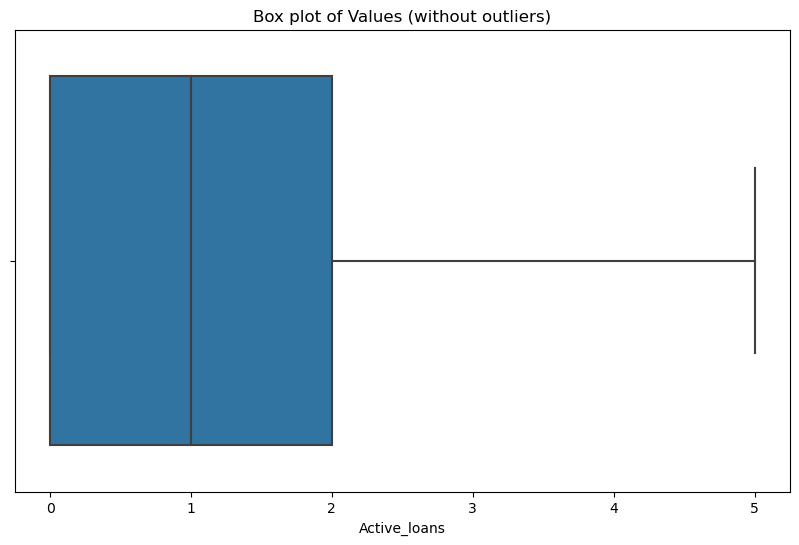

In [63]:
# Create a box plot for the cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Active_loans'])
plt.title('Box plot of Values (without outliers)')
plt.show()


<Axes: xlabel='Active_loans'>

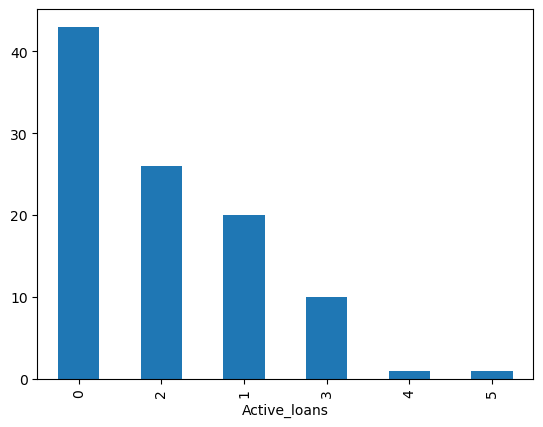

In [64]:
df['Active_loans'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

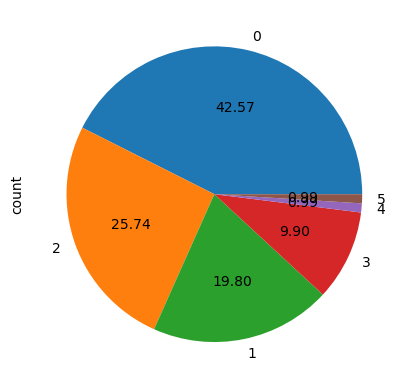

In [65]:
df['Active_loans'].value_counts().plot(kind='pie',autopct='%.2f')

# Bank_Products

In [66]:
df['Bank_Products'].value_counts()

Bank_Products
1    36
3    28
2    23
4     9
5     4
6     1
Name: count, dtype: int64

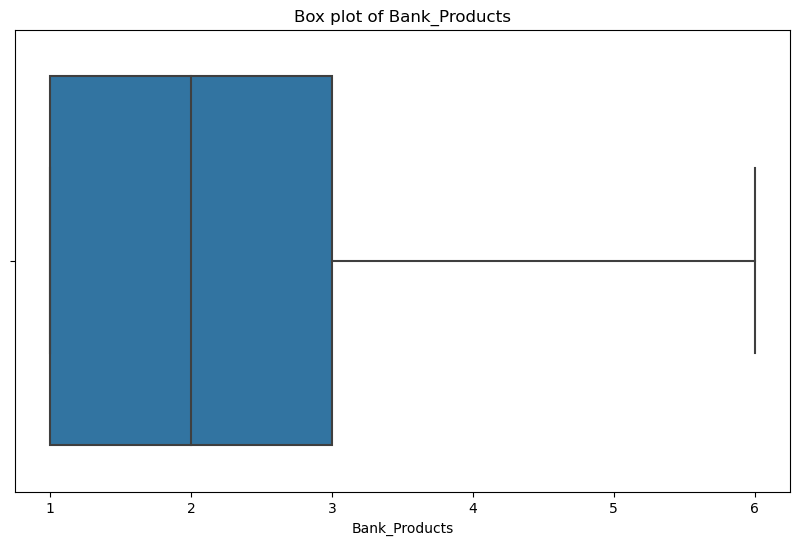

In [67]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Bank_Products'])
plt.title('Box plot of Bank_Products')
plt.show()


<Axes: xlabel='Bank_Products'>

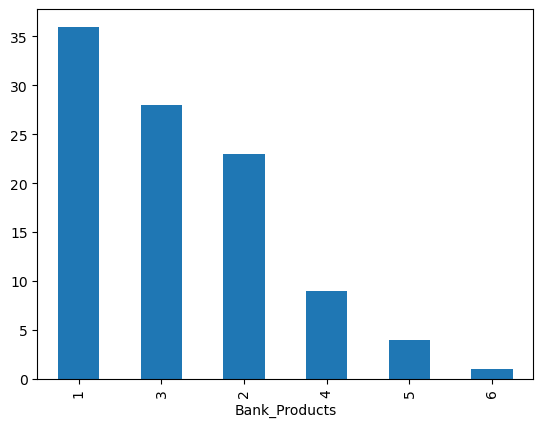

In [68]:
df['Bank_Products'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

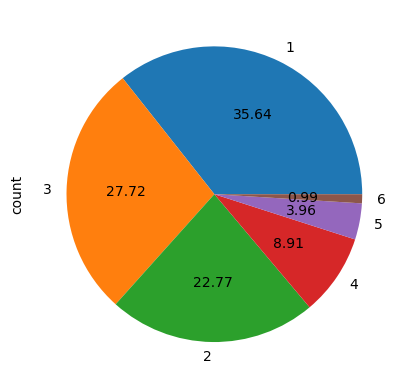

In [69]:
df['Bank_Products'].value_counts().plot(kind='pie',autopct='%.2f')

# Dependents

In [70]:
df['Dependents'].value_counts()

Dependents
3    27
0    19
4    17
2    14
5    13
1     6
6     3
7     1
8     1
Name: count, dtype: int64

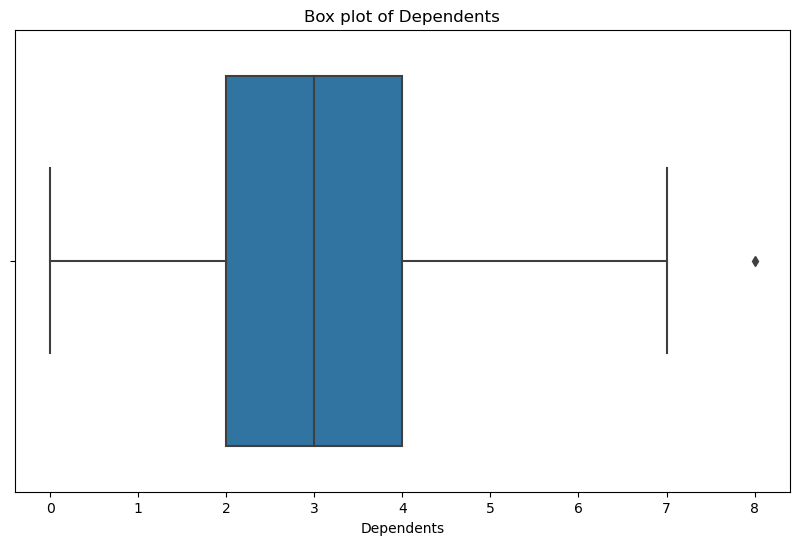

In [71]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Dependents'])
plt.title('Box plot of Dependents')
plt.show()


<Axes: xlabel='Dependents'>

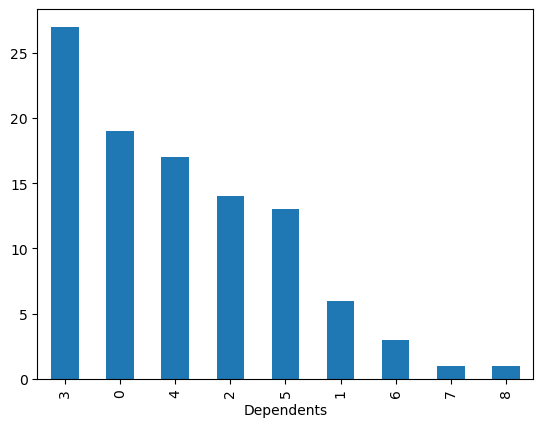

In [72]:
df['Dependents'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

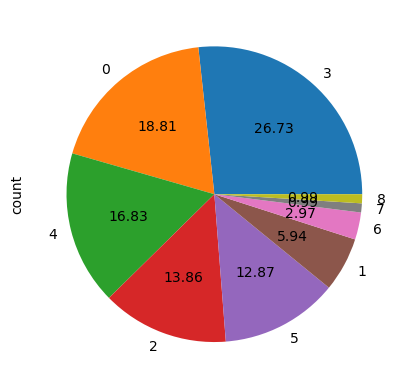

In [73]:
df['Dependents'].value_counts().plot(kind='pie',autopct='%.2f')

# Fixed Deposit	

In [74]:
df['Fixed Deposit'].value_counts()

Fixed Deposit
Yes        53
No         47
Yes, No     1
Name: count, dtype: int64

In [75]:
df['Fixed Deposit'] = df['Fixed Deposit'].replace('Yes, No', 'Yes')

In [76]:
df['Fixed Deposit'].value_counts()

Fixed Deposit
Yes    54
No     47
Name: count, dtype: int64

<Axes: xlabel='Fixed Deposit'>

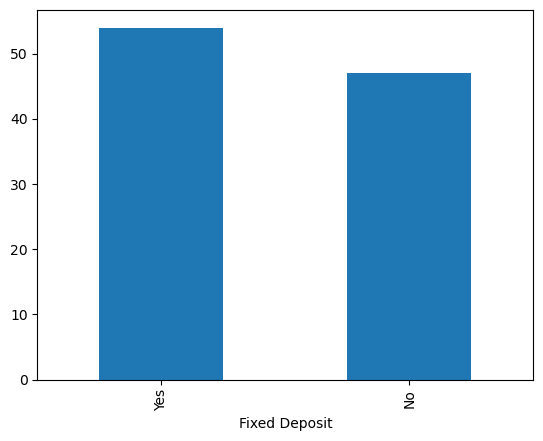

In [77]:
df['Fixed Deposit'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

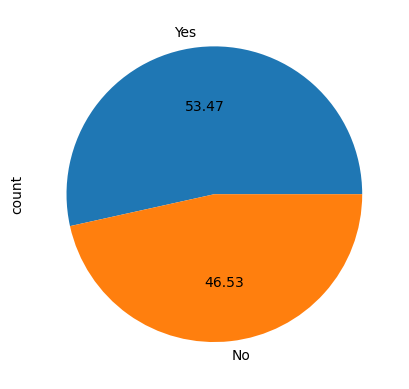

In [78]:
df['Fixed Deposit'].value_counts().plot(kind='pie',autopct='%.2f')

In [79]:
df

,Age,Annual Income,Occupation,AccountBalance,credit_score,Gender,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Married,Dependents
0,45,500100,Salaried,50000,760,Male,Graduate,2,5,No,11,33,100000,yes,2
1,49,480000,Salaried,30000,750,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,37,480000,Salaried,10000,710,Male,Under Graduate,0,2,Yes,6,34,30000,yes,4
3,21,240000,Salaried,5000,700,Male,Under Graduate,1,2,No,2,25,650000,no,0
4,42,35000,Housewife,12500,800,Female,Graduate,1,2,Yes,8,56,10000,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,Salaried,200000,750,Male,Post Graduate,1,6,Yes,14,61,400000,yes,2
97,55,600000,Other,100000,789,Male,Under Graduate,2,3,No,19,24,3700000,yes,3
98,28,120000,Housewife,20000,786,Female,Under Graduate,0,1,No,6,65,50599,yes,1
99,54,240000,Other,5000,768,Female,Under Graduate,1,2,No,17,34,134000,yes,3


# credit_score

In [80]:
df['credit_score'].value_counts()

credit_score
 700       12
 750       11
 0          9
 720        4
 800        3
 650        2
 786        2
 400        2
 780        2
 10000      2
 1000       2
 850        2
 710        2
 500        2
 546        1
 423        1
 655        1
 765        1
 582        1
 564        1
 589        1
 760        1
 689        1
 433        1
 679        1
 776        1
 851        1
 5000       1
 50000      1
 600        1
 480        1
 771        1
 789        1
 836        1
 711        1
 565        1
 355        1
 740        1
 690        1
 719        1
 640        1
 877        1
 180000     1
-1          1
 798        1
 367        1
 300        1
 459        1
 3          1
 378        1
 680        1
 620        1
 414        1
 817        1
 759        1
 568        1
 309        1
 768        1
Name: count, dtype: int64

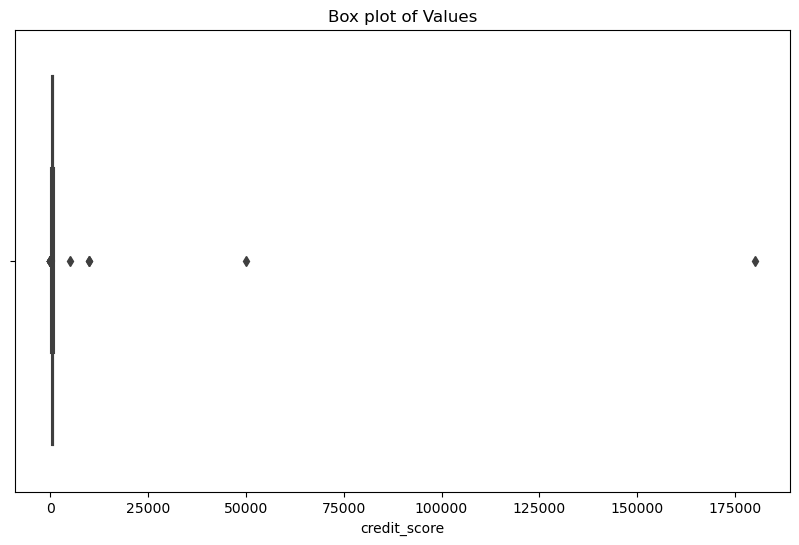

In [81]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['credit_score'])
plt.title('Box plot of Values')
plt.show()


In [82]:
df['credit_score'].describe()

count       101.000000
mean       3095.108911
std       18492.773054
min          -1.000000
25%         546.000000
50%         700.000000
75%         765.000000
max      180000.000000
Name: credit_score, dtype: float64

In [83]:
mean_value = df[(df['credit_score'] >= 300) & (df['credit_score'] <= 850)]['credit_score'].mean()


In [84]:
outliers = df[(df['credit_score'] < 300) | (df['credit_score'] > 850)]
print("Outliers:\n", outliers)


Outliers:
     Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
18   21              0      Other            4000             0    Male   
19   40        1200000   Salaried           50000           877    Male   
20   60         530000   Salaried          342000        180000    Male   
21   25        2400000   Salaried           10000            -1  Female   
24   45         420000   Salaried          200000             0    Male   
27   23         240000   Salaried            2000             0  Female   
30   75          24000      Other         3000000             0    Male   
32   50         180000      Other          100000             0    Male   
33   18              0      Other            2000             0    Male   
34   20              0      Other            5000             3    Male   
35   25           2000  Housewife           10000             0  Female   
54   48         600000   Salaried           25000          1000    Male   
59   45       

In [85]:
df['credit_score'] = np.where((df['credit_score'] < 300) | (df['credit_score'] > 850), mean_value, df['credit_score'])

In [86]:
df['credit_score'].value_counts()


credit_score
665.135802    20
700.000000    12
750.000000    11
720.000000     4
800.000000     3
780.000000     2
650.000000     2
786.000000     2
400.000000     2
500.000000     2
850.000000     2
710.000000     2
655.000000     1
423.000000     1
765.000000     1
582.000000     1
564.000000     1
546.000000     1
760.000000     1
836.000000     1
689.000000     1
433.000000     1
679.000000     1
776.000000     1
600.000000     1
480.000000     1
771.000000     1
789.000000     1
589.000000     1
759.000000     1
565.000000     1
300.000000     1
740.000000     1
690.000000     1
719.000000     1
640.000000     1
798.000000     1
367.000000     1
355.000000     1
378.000000     1
459.000000     1
680.000000     1
620.000000     1
414.000000     1
817.000000     1
711.000000     1
568.000000     1
309.000000     1
768.000000     1
Name: count, dtype: int64

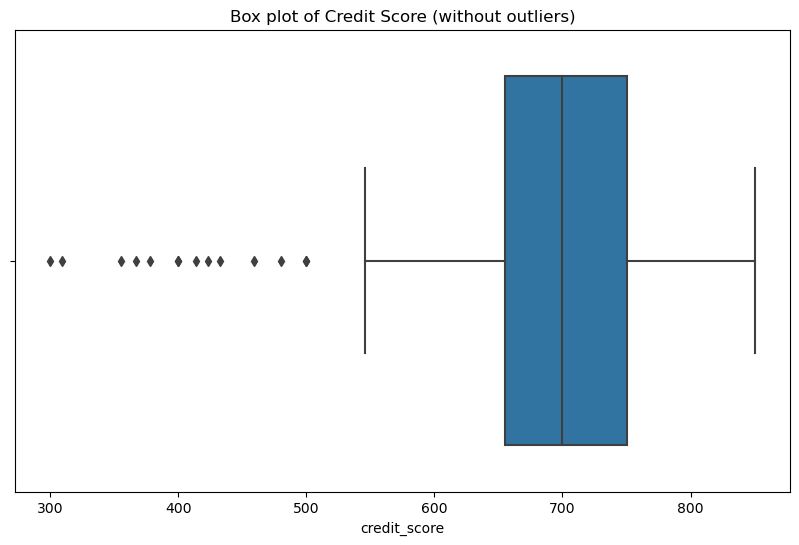

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['credit_score'])
plt.title('Box plot of Credit Score (without outliers)')
plt.show()

In [88]:
df['credit_score'].describe()


count    101.000000
mean     665.135802
std      121.940211
min      300.000000
25%      655.000000
50%      700.000000
75%      750.000000
max      850.000000
Name: credit_score, dtype: float64

In [89]:
df.shape

(101, 15)

# Annual Income	

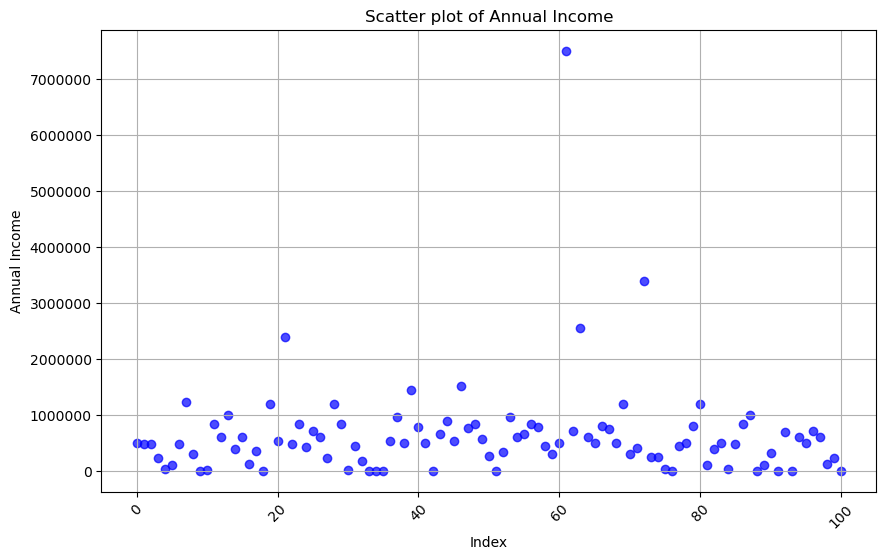

In [90]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['Annual Income'], color='blue', alpha=0.7)
plt.title('Scatter plot of Annual Income')
plt.xlabel('Index')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 [Text(-1000000.0, 0, '−1000000'),
  Text(0.0, 0, '0'),
  Text(1000000.0, 0, '1000000'),
  Text(2000000.0, 0, '2000000'),
  Text(3000000.0, 0, '3000000'),
  Text(4000000.0, 0, '4000000'),
  Text(5000000.0, 0, '5000000'),
  Text(6000000.0, 0, '6000000'),
  Text(7000000.0, 0, '7000000'),
  Text(8000000.0, 0, '8000000')])

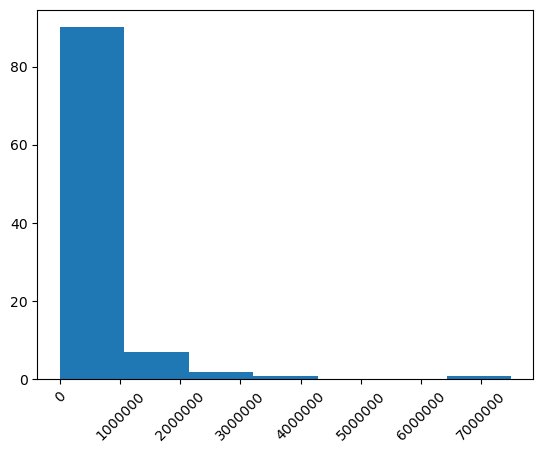

In [91]:
plt.hist(df['Annual Income'],bins = 7)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

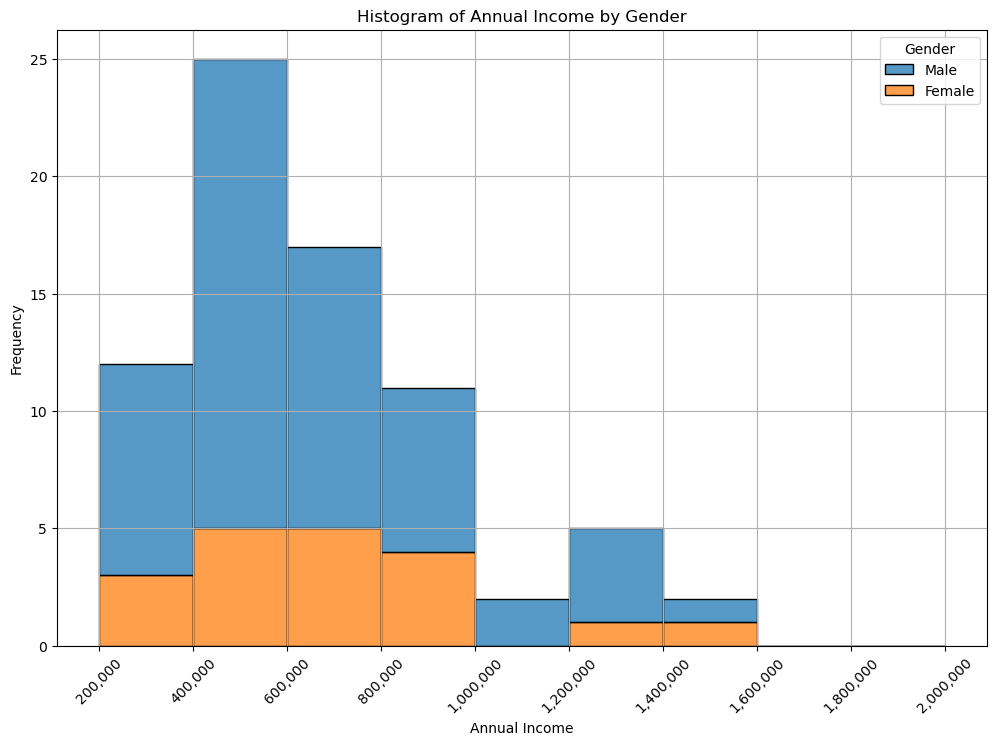

In [92]:

# Define bins for the histogram
bins = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000, 2000000]

# Create the histogram with hue
plt.figure(figsize=(12, 8))
sns.histplot(df, x='Annual Income', hue='Gender', bins=bins, multiple='stack', edgecolor='black')

# Customize the x-axis labels
plt.ticklabel_format(style='plain')
plt.xticks(bins, [f'{x:,}' for x in bins], rotation=45)

# Add titles and labels
plt.title('Histogram of Annual Income by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

/Users/harendrakshirsagar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


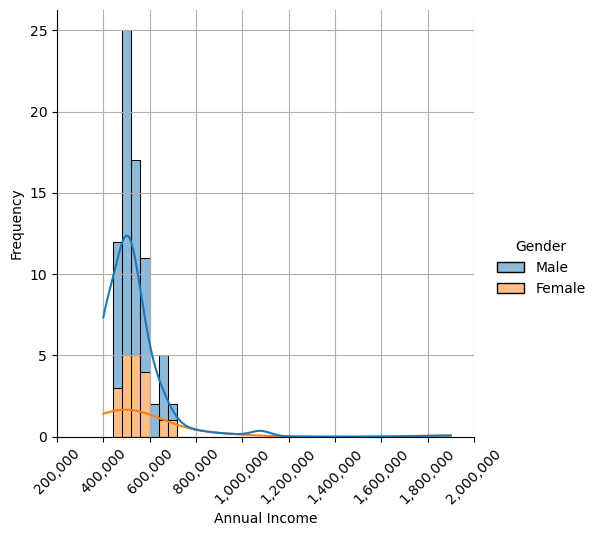

In [93]:

# Define bins for the histogram
bins = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000, 2000000]

# Create the histogram with hue using displot
g = sns.displot(df, x='Annual Income', hue='Gender', bins=bins, kind='hist', multiple='stack', edgecolor='black',kde=True)

# Customize the x-axis labels
g.set_axis_labels('Annual Income', 'Frequency')
g.set_titles('Histogram of Annual Income by Gender')
g.set_xticklabels([f'{x:,}' for x in bins], rotation=45)

# Show the plot
plt.grid(True)
plt.show()

# AccountBalance

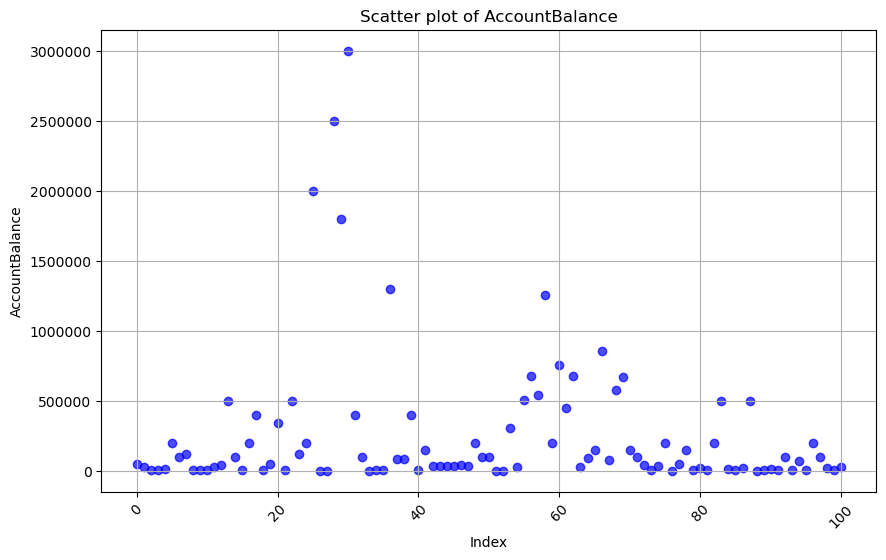

In [94]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['AccountBalance'], color='blue', alpha=0.7)
plt.title('Scatter plot of AccountBalance')
plt.xlabel('Index')
plt.ylabel('AccountBalance')
plt.grid(True)
plt.show()

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(-500000.0, 0, '−500000'),
  Text(0.0, 0, '0'),
  Text(500000.0, 0, '500000'),
  Text(1000000.0, 0, '1000000'),
  Text(1500000.0, 0, '1500000'),
  Text(2000000.0, 0, '2000000'),
  Text(2500000.0, 0, '2500000'),
  Text(3000000.0, 0, '3000000'),
  Text(3500000.0, 0, '3500000')])

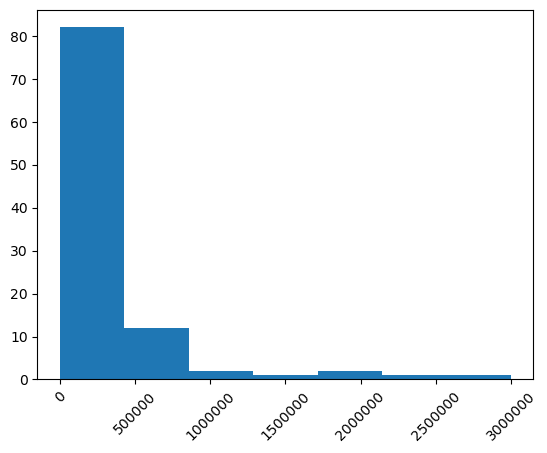

In [95]:
plt.hist(df['AccountBalance'],bins = 7)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

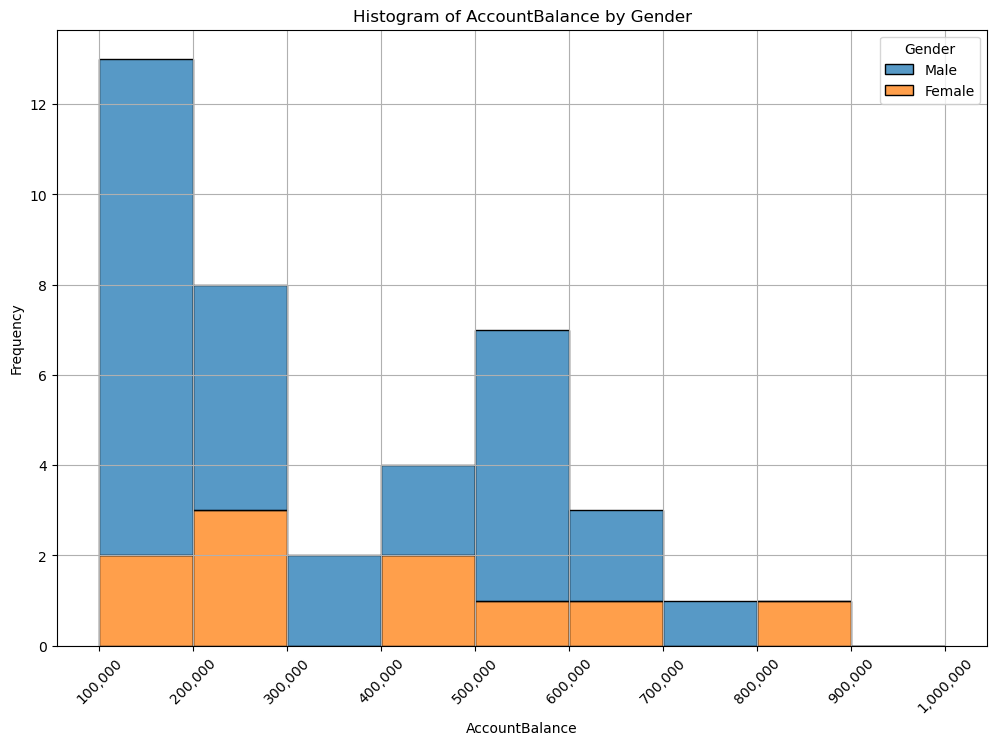

In [96]:

# Define bins for the histogram
bins = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

# Create the histogram with hue
plt.figure(figsize=(12, 8))
sns.histplot(df, x='AccountBalance', hue='Gender', bins=bins, multiple='stack', edgecolor='black')

# Customize the x-axis labels
plt.ticklabel_format(style='plain')
plt.xticks(bins, [f'{x:,}' for x in bins], rotation=45)

# Add titles and labels
plt.title('Histogram of AccountBalance by Gender')
plt.xlabel('AccountBalance')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

# Networth

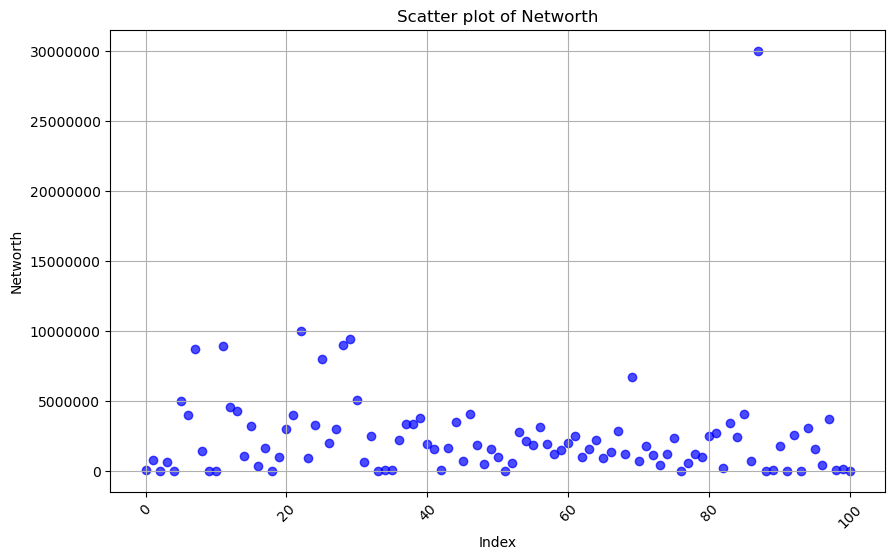

In [97]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['Networth'], color='blue', alpha=0.7)
plt.title('Scatter plot of Networth')
plt.xlabel('Index')
plt.ylabel('Networth')
plt.grid(True)
plt.show()

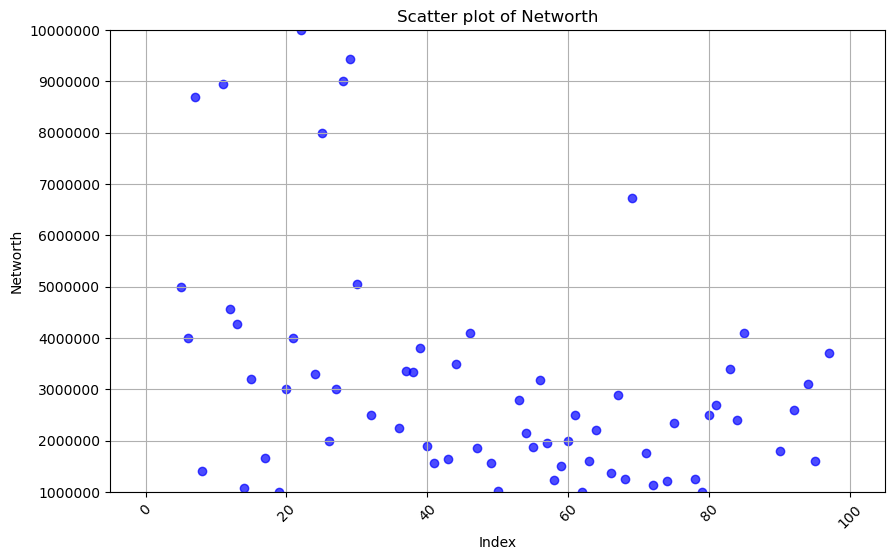

In [98]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['Networth'], color='blue', alpha=0.7)
plt.title('Scatter plot of Networth')
plt.xlabel('Index')
plt.ylabel('Networth')
plt.grid(True)

plt.ylim(1000000, 10000000)
plt.yticks(range(1000000, 10000001, 1000000))

plt.show()

(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000., 35000000.]),
 [Text(-5000000.0, 0, '−5000000'),
  Text(0.0, 0, '0'),
  Text(5000000.0, 0, '5000000'),
  Text(10000000.0, 0, '10000000'),
  Text(15000000.0, 0, '15000000'),
  Text(20000000.0, 0, '20000000'),
  Text(25000000.0, 0, '25000000'),
  Text(30000000.0, 0, '30000000'),
  Text(35000000.0, 0, '35000000')])

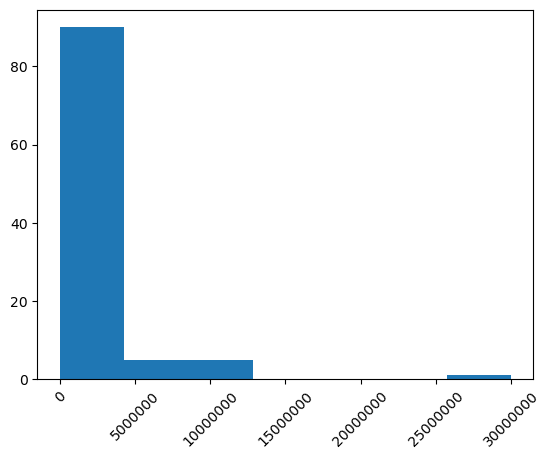

In [99]:
plt.hist(df['Networth'],bins = 7)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

# Bivariate Analysis

In [100]:
df

,Age,Annual Income,Occupation,AccountBalance,credit_score,Gender,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Married,Dependents
0,45,500100,Salaried,50000,760.0,Male,Graduate,2,5,No,11,33,100000,yes,2
1,49,480000,Salaried,30000,750.0,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,37,480000,Salaried,10000,710.0,Male,Under Graduate,0,2,Yes,6,34,30000,yes,4
3,21,240000,Salaried,5000,700.0,Male,Under Graduate,1,2,No,2,25,650000,no,0
4,42,35000,Housewife,12500,800.0,Female,Graduate,1,2,Yes,8,56,10000,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,Salaried,200000,750.0,Male,Post Graduate,1,6,Yes,14,61,400000,yes,2
97,55,600000,Other,100000,789.0,Male,Under Graduate,2,3,No,19,24,3700000,yes,3
98,28,120000,Housewife,20000,786.0,Female,Under Graduate,0,1,No,6,65,50599,yes,1
99,54,240000,Other,5000,768.0,Female,Under Graduate,1,2,No,17,34,134000,yes,3


# Age vs Annual Income

<Axes: xlabel='Annual Income', ylabel='Age'>

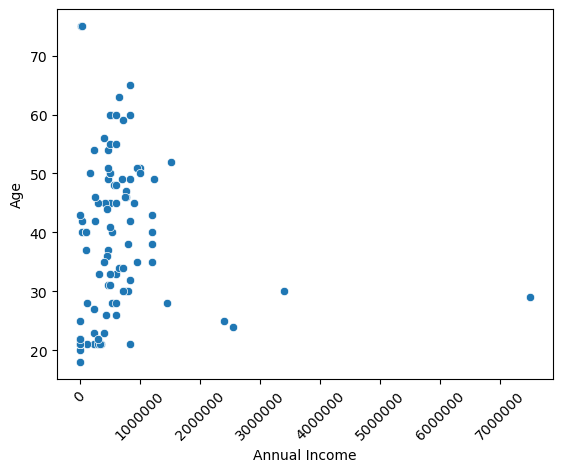

In [101]:
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='Age',data=df)

<Axes: xlabel='Annual Income', ylabel='Age'>

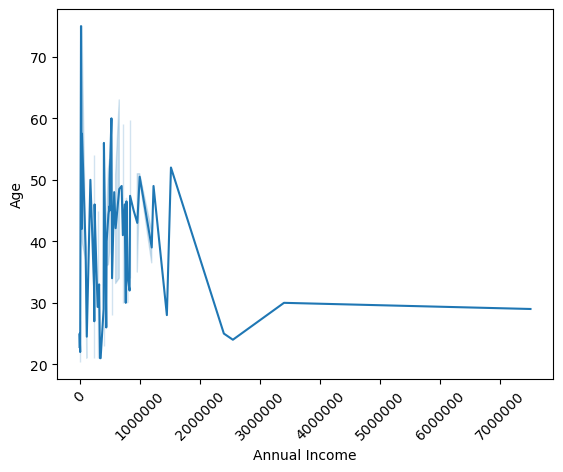

In [102]:
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.lineplot(x='Annual Income',y='Age',data=df)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 [Text(-1000000.0, 0, '−1000000'),
  Text(0.0, 0, '0'),
  Text(1000000.0, 0, '1000000'),
  Text(2000000.0, 0, '2000000'),
  Text(3000000.0, 0, '3000000'),
  Text(4000000.0, 0, '4000000'),
  Text(5000000.0, 0, '5000000'),
  Text(6000000.0, 0, '6000000'),
  Text(7000000.0, 0, '7000000'),
  Text(8000000.0, 0, '8000000')])

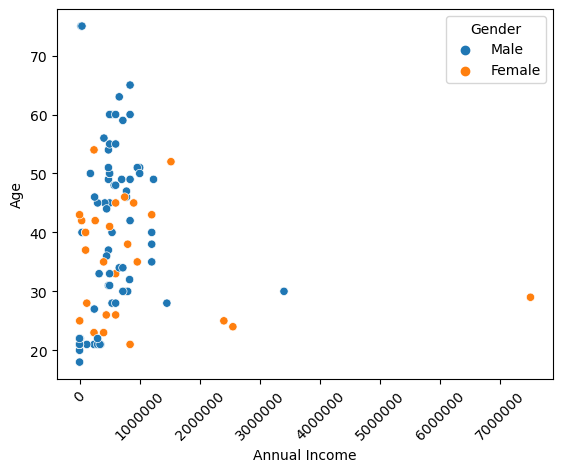

In [103]:
sns.scatterplot(x='Annual Income',y='Age',data=df,hue=df['Gender'])
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

<Axes: xlabel='Annual Income', ylabel='Age'>

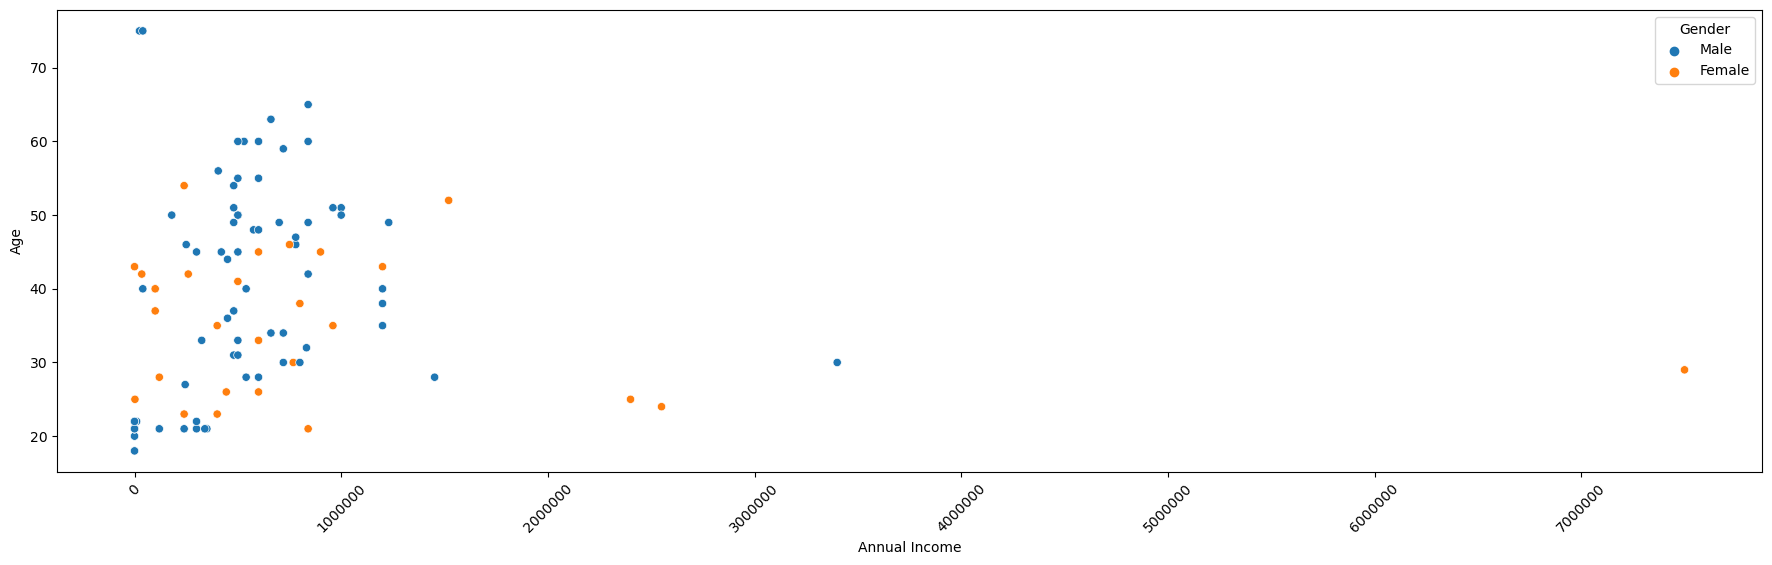

In [104]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='Age',data=df,hue=df['Gender'])

<Axes: xlabel='AccountBalance', ylabel='Age'>

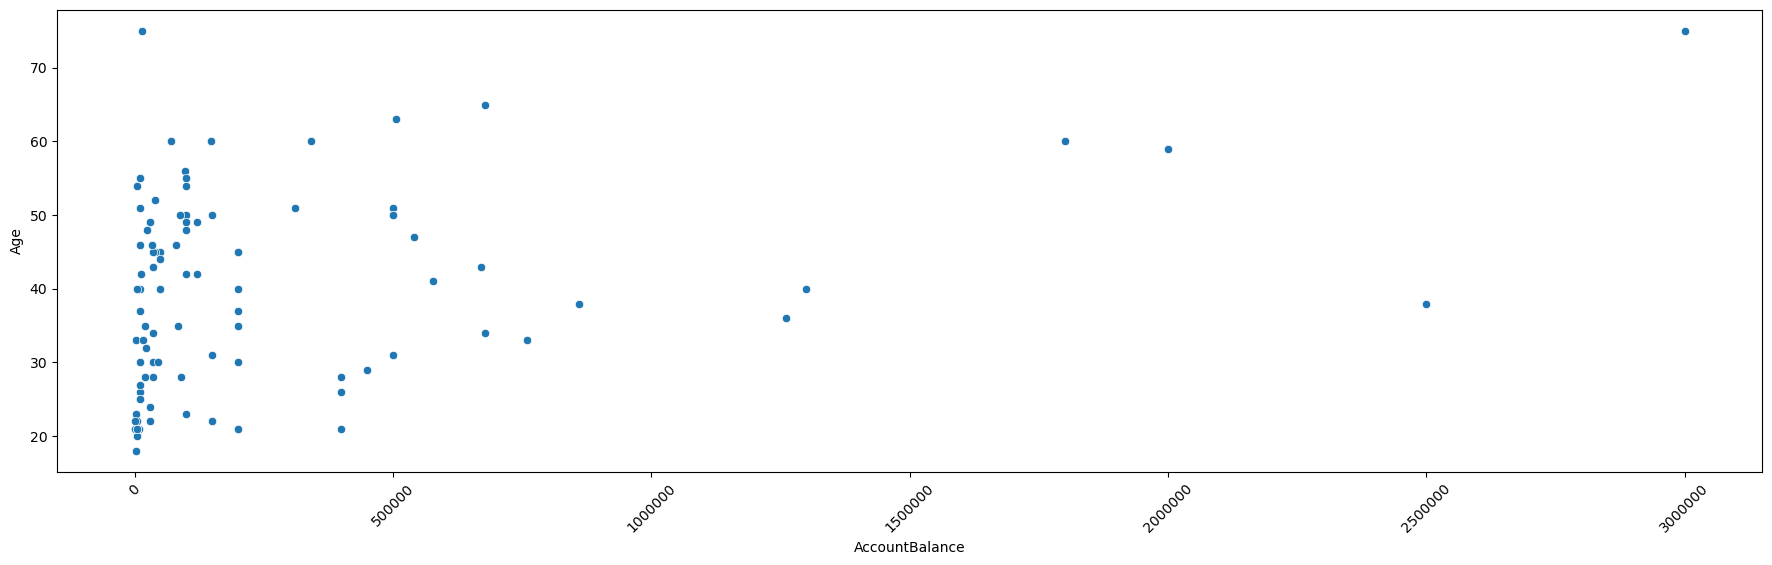

In [105]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='AccountBalance',y='Age',data=df)

<Axes: xlabel='AccountBalance', ylabel='Age'>

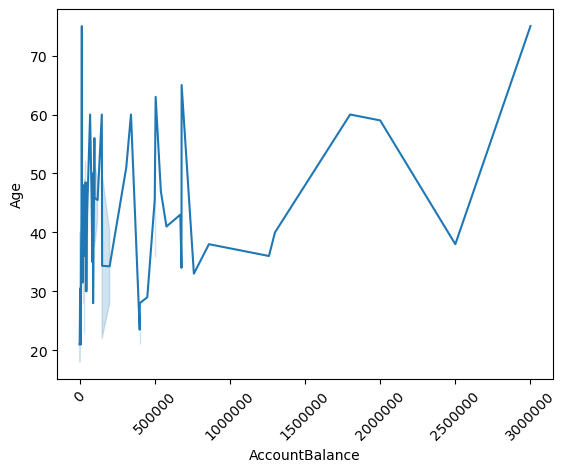

In [106]:
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

sns.lineplot(x='AccountBalance',y='Age',data=df)

In [107]:
df

,Age,Annual Income,Occupation,AccountBalance,credit_score,Gender,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Married,Dependents
0,45,500100,Salaried,50000,760.0,Male,Graduate,2,5,No,11,33,100000,yes,2
1,49,480000,Salaried,30000,750.0,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,37,480000,Salaried,10000,710.0,Male,Under Graduate,0,2,Yes,6,34,30000,yes,4
3,21,240000,Salaried,5000,700.0,Male,Under Graduate,1,2,No,2,25,650000,no,0
4,42,35000,Housewife,12500,800.0,Female,Graduate,1,2,Yes,8,56,10000,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,Salaried,200000,750.0,Male,Post Graduate,1,6,Yes,14,61,400000,yes,2
97,55,600000,Other,100000,789.0,Male,Under Graduate,2,3,No,19,24,3700000,yes,3
98,28,120000,Housewife,20000,786.0,Female,Under Graduate,0,1,No,6,65,50599,yes,1
99,54,240000,Other,5000,768.0,Female,Under Graduate,1,2,No,17,34,134000,yes,3


# Annual Income	 vs credit_score

(0.0, 1100.0)

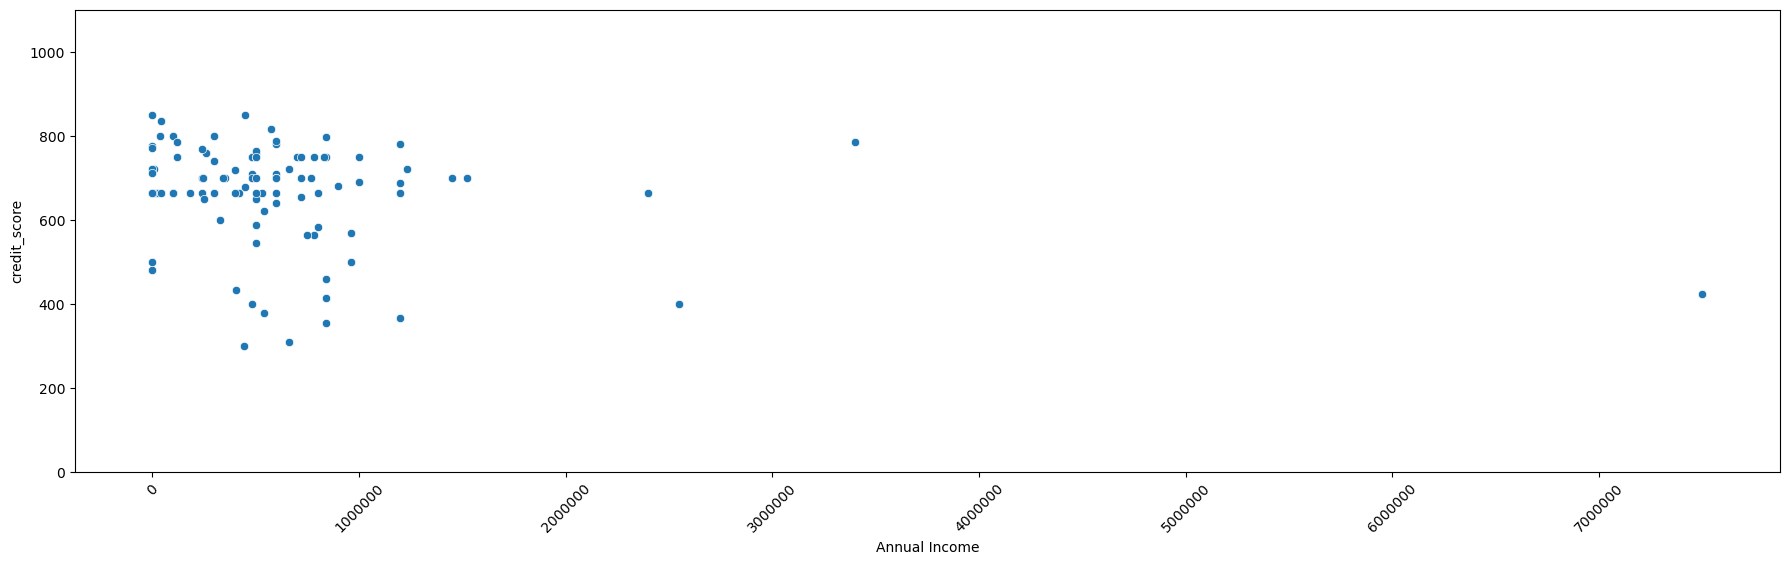

In [108]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='credit_score',data=df)
plt.ylim(0, 1100)

(250.0, 900.0)

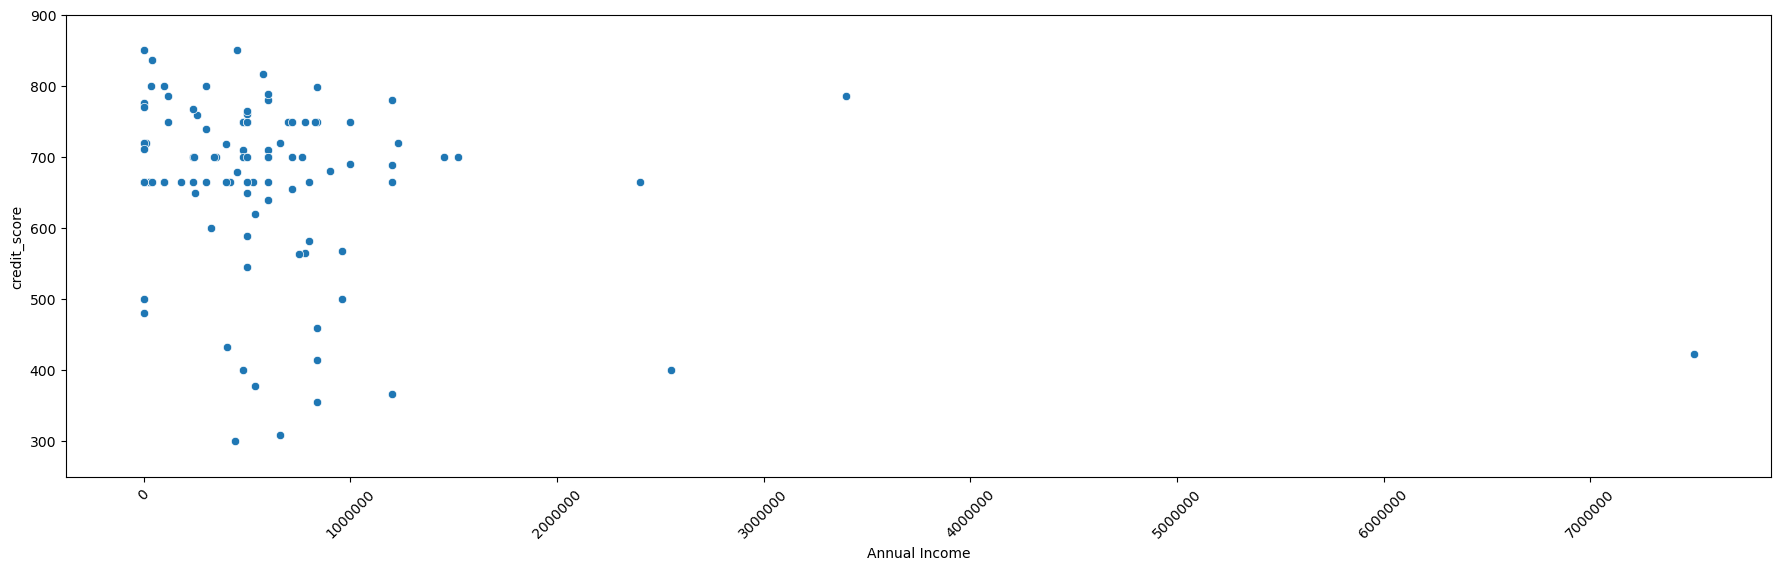

In [109]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='credit_score',data=df)
plt.ylim(250, 900)

In [110]:
df['credit_score'].describe()

count    101.000000
mean     665.135802
std      121.940211
min      300.000000
25%      655.000000
50%      700.000000
75%      750.000000
max      850.000000
Name: credit_score, dtype: float64

# credit_score vs LastMonthTrans

(0.0, 1100.0)

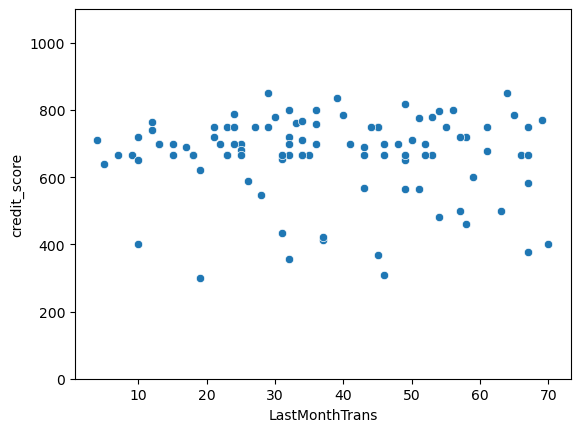

In [111]:
sns.scatterplot(x='LastMonthTrans',y='credit_score',data=df)
# Set the maximum value for both axes to 1000
#plt.xlim(0, 1000)
plt.ylim(0, 1100)

(0.0, 1200.0)

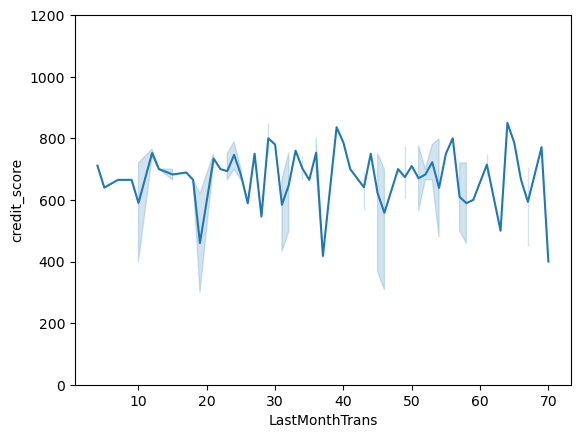

In [112]:
sns.lineplot(x='LastMonthTrans',y='credit_score',data=df)
plt.ylim(0,1200)

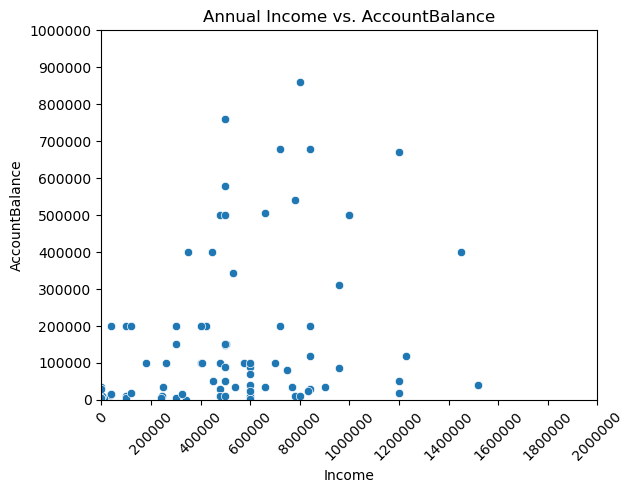

In [113]:
sns.scatterplot(x='Annual Income', y='AccountBalance', data=df)

# Set the axis ranges
plt.xlim(200000, 2000000)
plt.ylim(100000, 1000000)

# Set tick marks for better readability
plt.xticks(range(0, 2000001, 200000))
plt.yticks(range(0, 1000001, 100000))




plt.ticklabel_format(style='plain')
plt.xticks(rotation=45) 
plt.title('Annual Income vs. AccountBalance')
plt.xlabel('Income')
plt.ylabel('AccountBalance')
plt.show()

In [114]:
df

,Age,Annual Income,Occupation,AccountBalance,credit_score,Gender,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Married,Dependents
0,45,500100,Salaried,50000,760.0,Male,Graduate,2,5,No,11,33,100000,yes,2
1,49,480000,Salaried,30000,750.0,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,37,480000,Salaried,10000,710.0,Male,Under Graduate,0,2,Yes,6,34,30000,yes,4
3,21,240000,Salaried,5000,700.0,Male,Under Graduate,1,2,No,2,25,650000,no,0
4,42,35000,Housewife,12500,800.0,Female,Graduate,1,2,Yes,8,56,10000,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,Salaried,200000,750.0,Male,Post Graduate,1,6,Yes,14,61,400000,yes,2
97,55,600000,Other,100000,789.0,Male,Under Graduate,2,3,No,19,24,3700000,yes,3
98,28,120000,Housewife,20000,786.0,Female,Under Graduate,0,1,No,6,65,50599,yes,1
99,54,240000,Other,5000,768.0,Female,Under Graduate,1,2,No,17,34,134000,yes,3


<Axes: xlabel='AccountBalance', ylabel='Networth'>

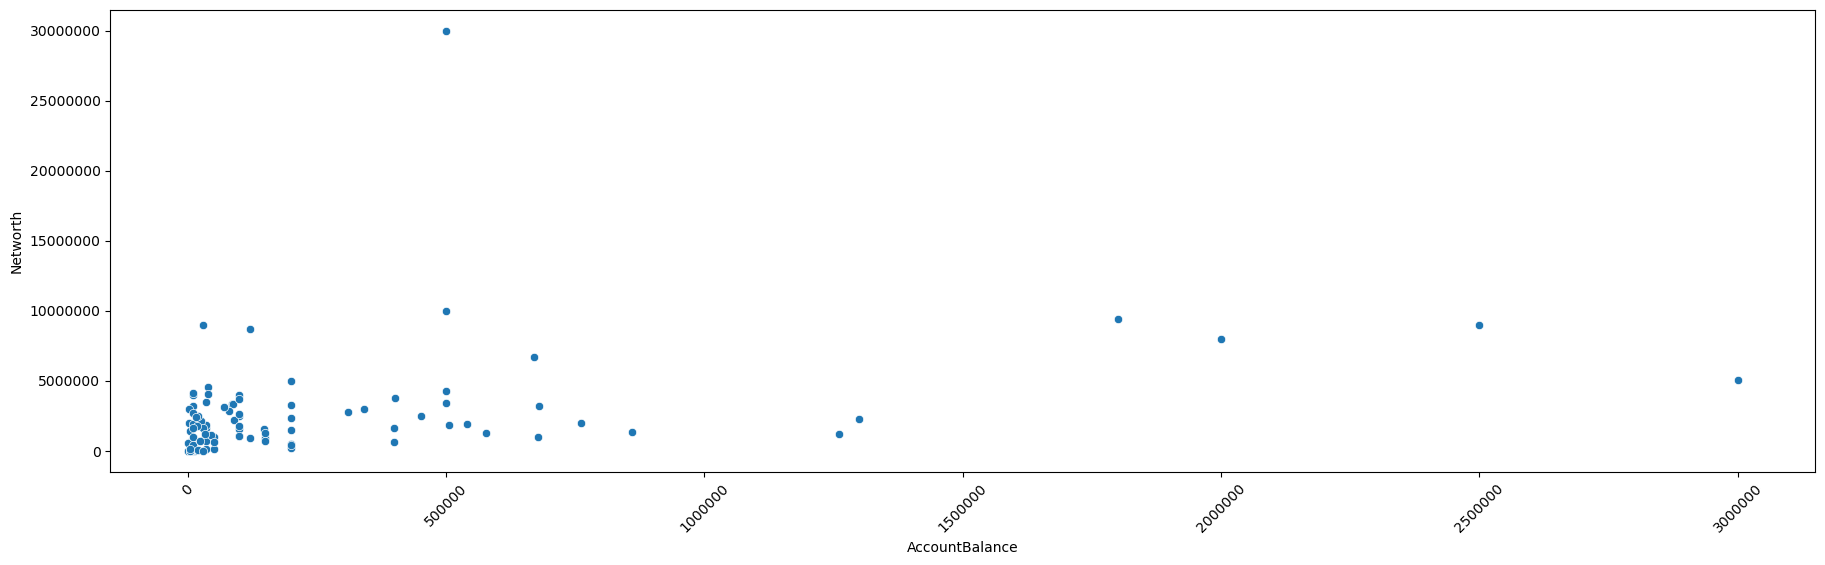

In [115]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='AccountBalance',y='Networth',data=df)

<Axes: xlabel='AccountBalance', ylabel='Networth'>

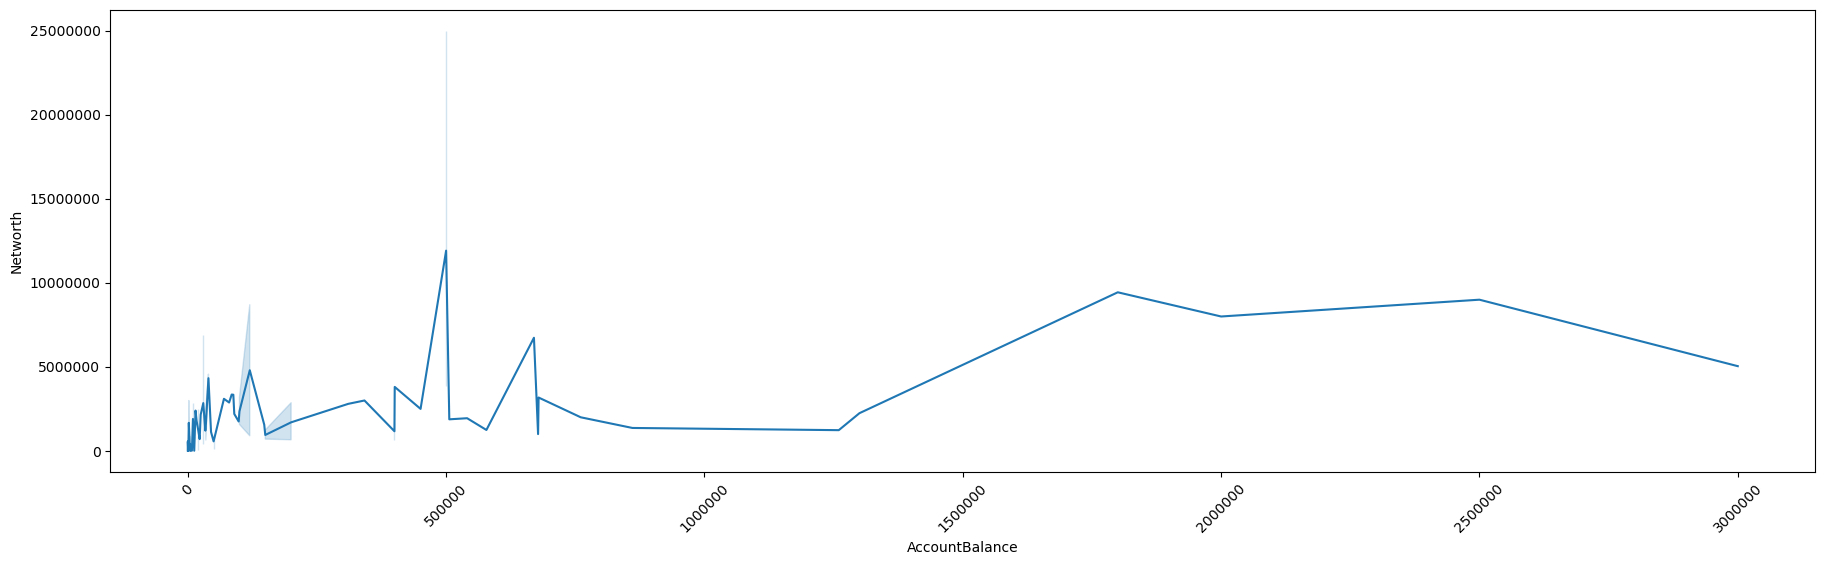

In [116]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.lineplot(x='AccountBalance',y='Networth',data=df)

<Axes: xlabel='Age', ylabel='Networth'>

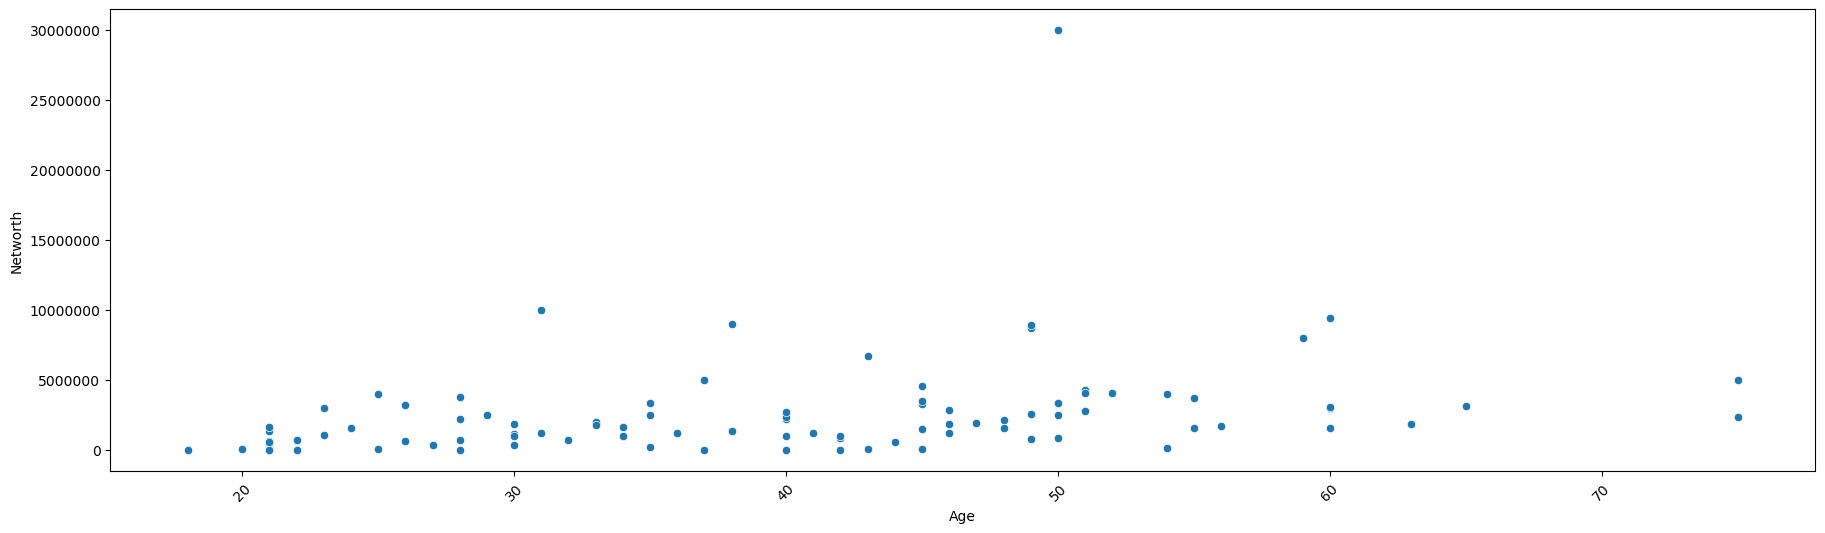

In [117]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Age',y='Networth',data=df)

<Axes: xlabel='Age', ylabel='Networth'>

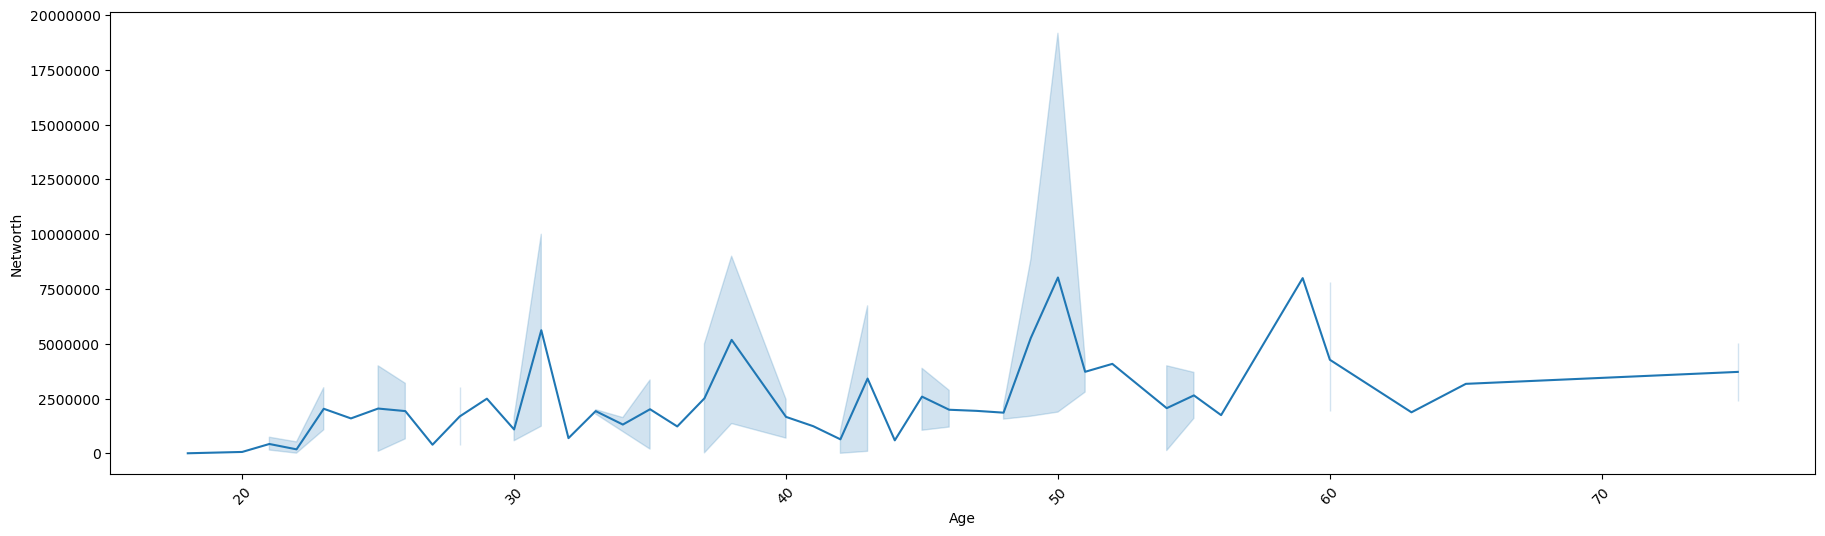

In [118]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.lineplot(x='Age',y='Networth',data=df)

# Married vs Networth

In [119]:
df['Married'].value_counts()

Married
yes    77
no     24
Name: count, dtype: int64

<Axes: xlabel='Married', ylabel='Networth'>

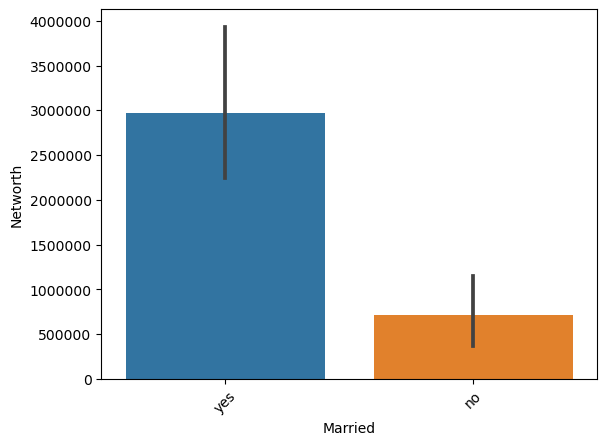

In [120]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Married',y='Networth',data=df)

# Gender vs Networth

<Axes: xlabel='Gender', ylabel='Networth'>

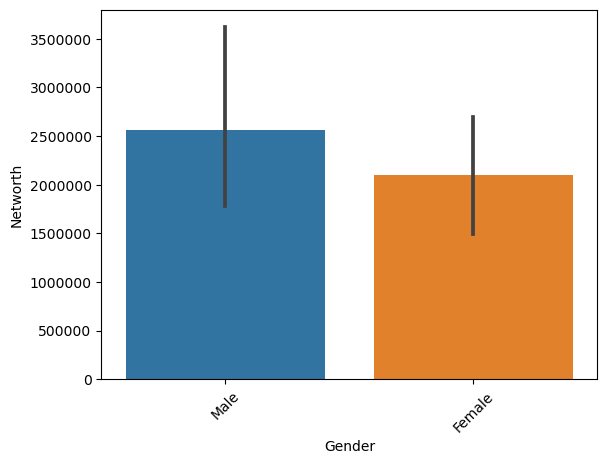

In [121]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Gender',y='Networth',data=df)

/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_1150/1244760426.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_1150/1244760426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

<Axes: xlabel='Networth', ylabel='Density'>

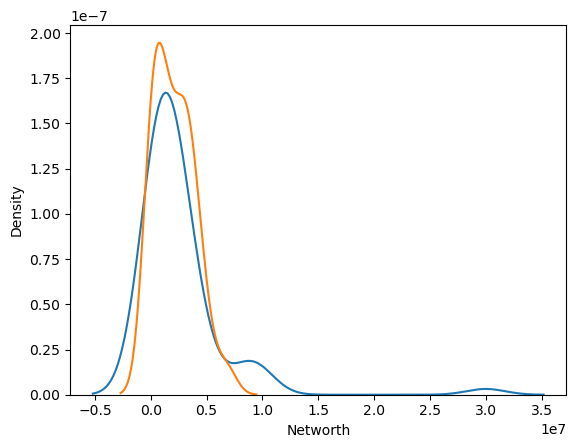

In [122]:
sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
sns.distplot(df[df['Gender']=='Female']['Networth'],hist=False)

In [123]:
df

,Age,Annual Income,Occupation,AccountBalance,credit_score,Gender,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Married,Dependents
0,45,500100,Salaried,50000,760.0,Male,Graduate,2,5,No,11,33,100000,yes,2
1,49,480000,Salaried,30000,750.0,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,37,480000,Salaried,10000,710.0,Male,Under Graduate,0,2,Yes,6,34,30000,yes,4
3,21,240000,Salaried,5000,700.0,Male,Under Graduate,1,2,No,2,25,650000,no,0
4,42,35000,Housewife,12500,800.0,Female,Graduate,1,2,Yes,8,56,10000,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,Salaried,200000,750.0,Male,Post Graduate,1,6,Yes,14,61,400000,yes,2
97,55,600000,Other,100000,789.0,Male,Under Graduate,2,3,No,19,24,3700000,yes,3
98,28,120000,Housewife,20000,786.0,Female,Under Graduate,0,1,No,6,65,50599,yes,1
99,54,240000,Other,5000,768.0,Female,Under Graduate,1,2,No,17,34,134000,yes,3


# Active_loans vs Networth

/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_1150/3145418287.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_1150/3145418287.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

<Axes: xlabel='Networth', ylabel='Density'>

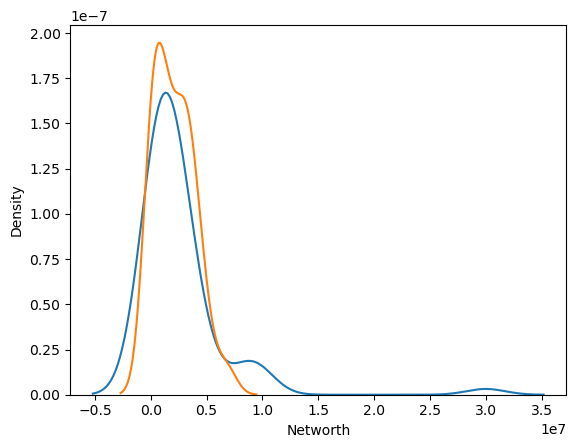

In [124]:
#plt.figure(figsize=(22, 6))
#plt.ticklabel_format(style='plain')
#plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)
sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
sns.distplot(df[df['Gender']=='Female']['Networth'],hist=False)

/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_1150/3601542953.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='Male']['Networth'], hist=False, color='blue', label='Male')
/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_1150/3601542953.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/m

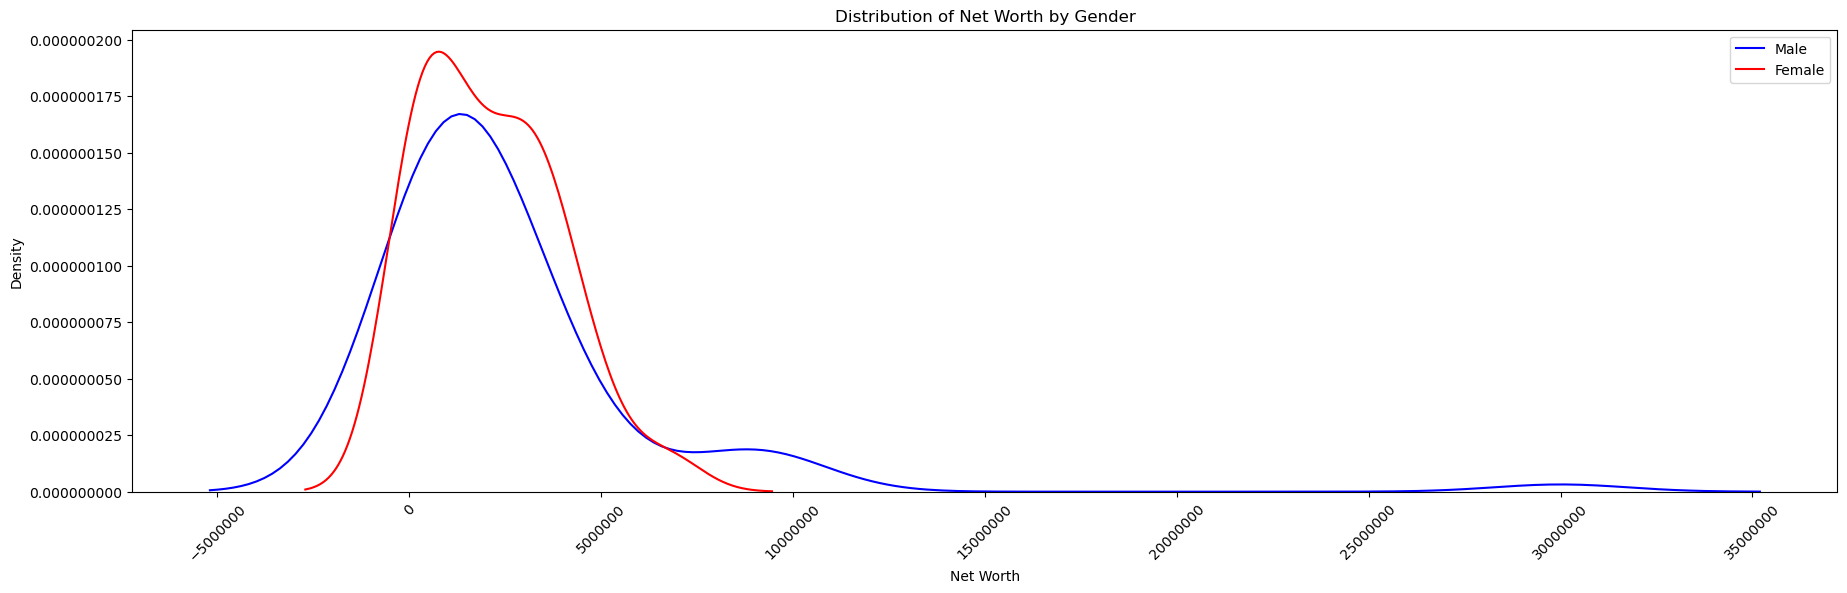

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(22, 6))

# Remove scientific notation for tick labels
plt.ticklabel_format(style='plain')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Create distribution plots with specified colors
sns.distplot(df[df['Gender']=='Male']['Networth'], hist=False, color='blue', label='Male')
sns.distplot(df[df['Gender']=='Female']['Networth'], hist=False, color='red', label='Female')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Net Worth')
plt.ylabel('Density')
plt.title('Distribution of Net Worth by Gender')

# Display the plot
plt.show()


<Axes: xlabel='Active_loans', ylabel='Networth'>

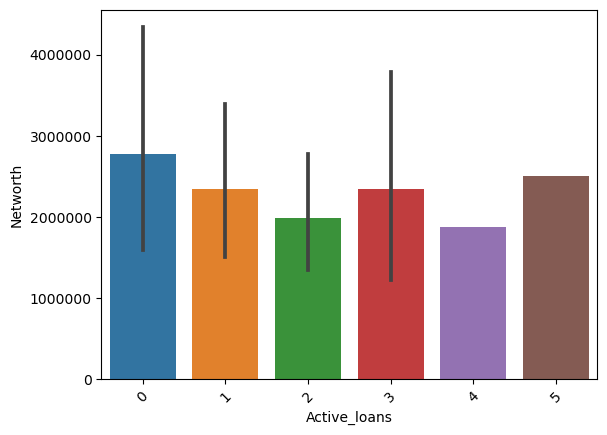

In [126]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Active_loans',y='Networth',data=df)

# Active Loans vs Credit score

<Axes: xlabel='Active_loans', ylabel='credit_score'>

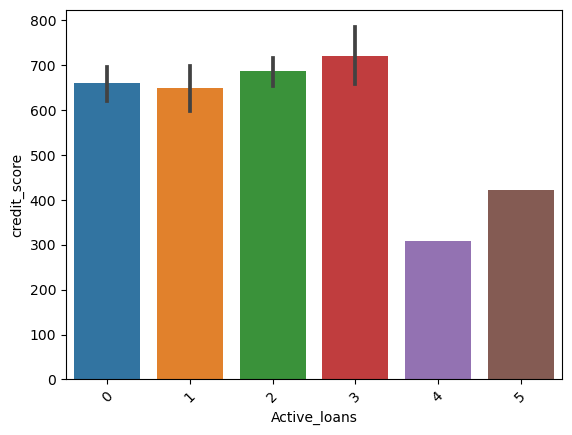

In [127]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Active_loans',y='credit_score',data=df)

# Active Loans vs LastMonthTrans

<Axes: xlabel='Active_loans', ylabel='LastMonthTrans'>

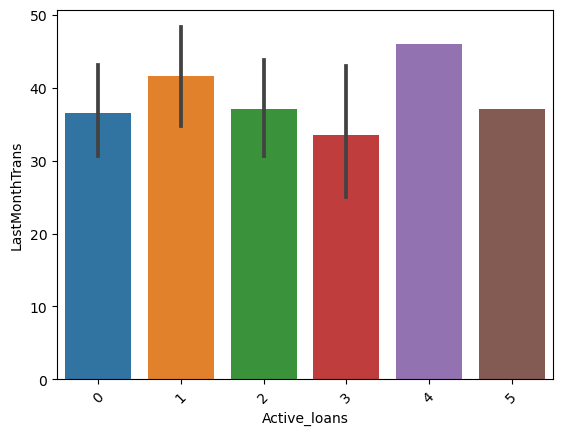

In [128]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Active_loans',y='LastMonthTrans',data=df)

# Bank Products vs Annual Income

In [129]:
df['Bank_Products'].value_counts()

Bank_Products
1    36
3    28
2    23
4     9
5     4
6     1
Name: count, dtype: int64

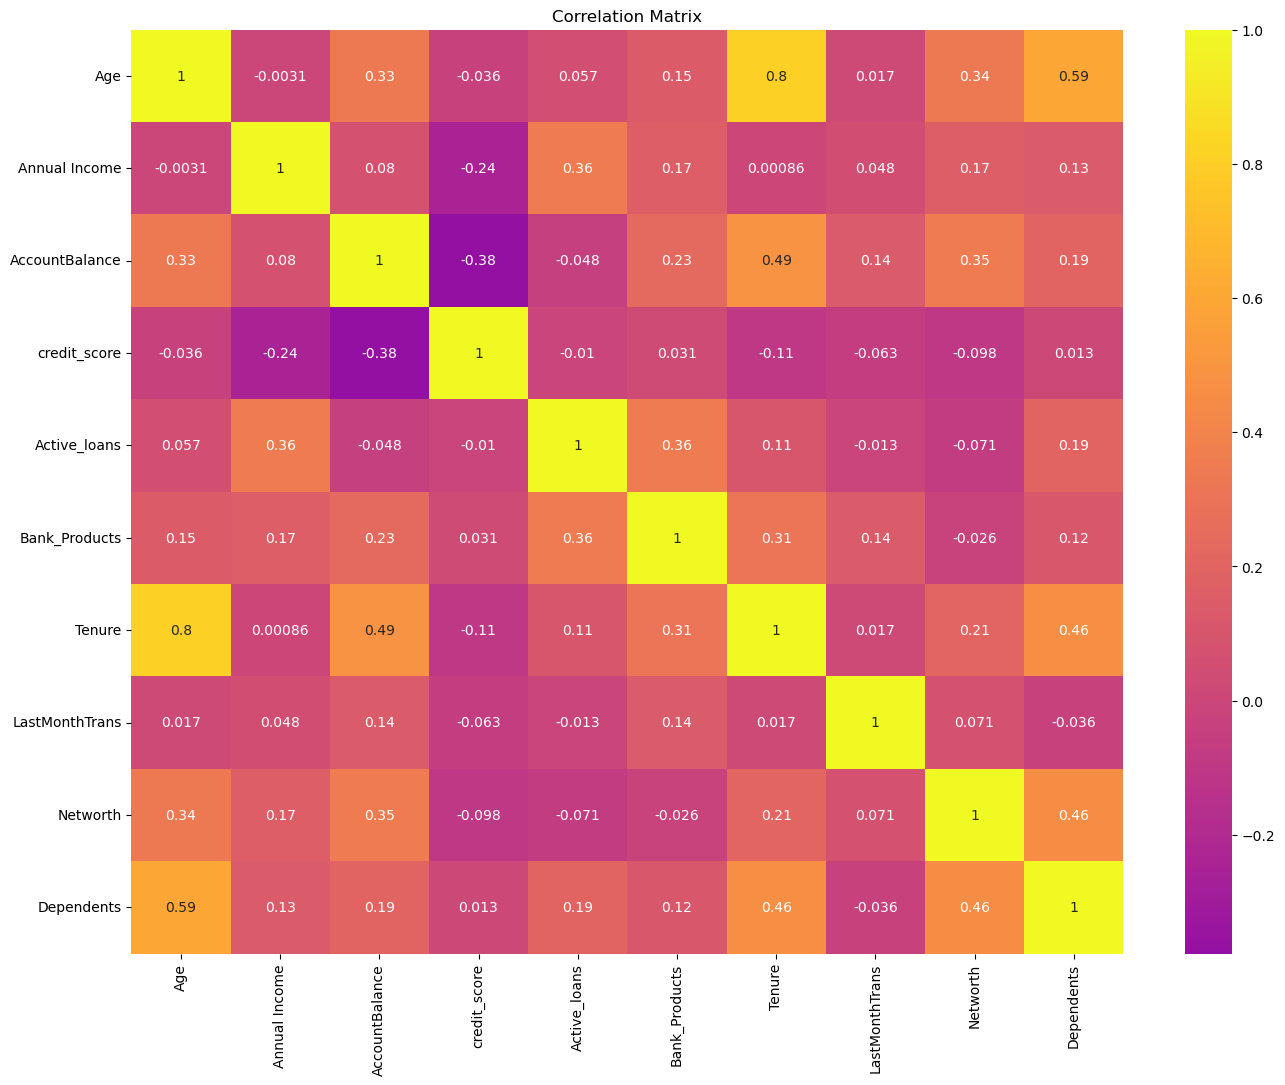

In [130]:
df1 = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = df1.corr()
plt.figure(figsize=(16, 12))
# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='plasma', center=0)
plt.title('Correlation Matrix')
plt.show()

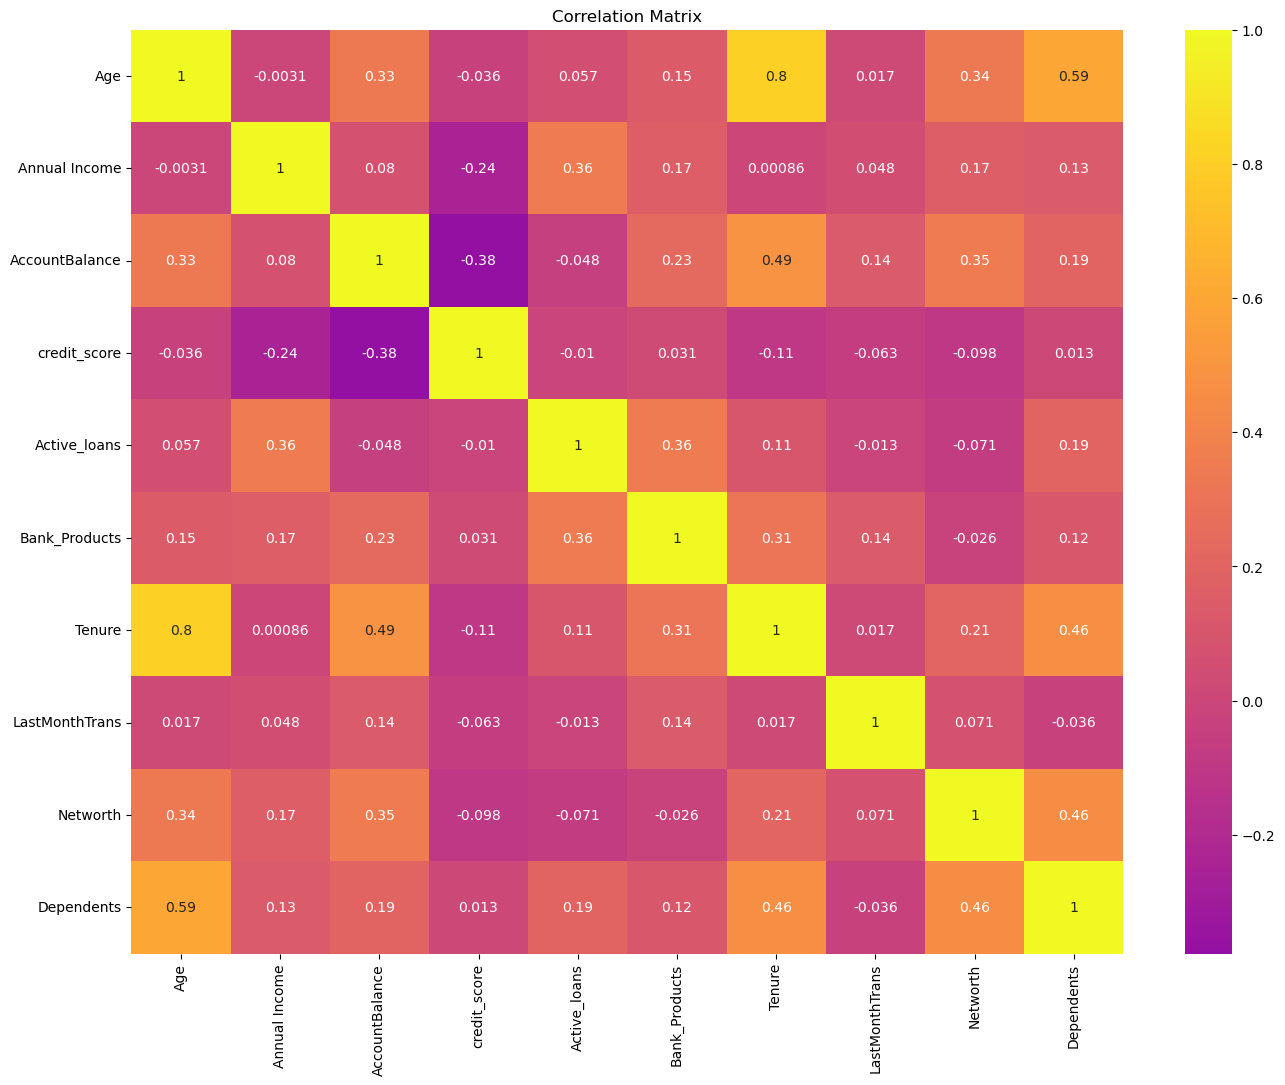

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
df1 = df.select_dtypes(include=['int64', 'float64'])

# Optionally handle missing values, e.g., fill with the mean or drop rows/columns with missing values
df1 = df1.fillna(df1.mean())  # or df1.dropna() if you prefer to drop rows/columns with missing values

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', center=0)
plt.title('Correlation Matrix')
plt.show()


Age                 int64
Annual Income       int64
AccountBalance      int64
credit_score      float64
Active_loans        int64
Bank_Products       int64
Tenure              int64
LastMonthTrans      int64
Networth            int64
Dependents          int64
dtype: object
              Age  Annual Income  AccountBalance  credit_score  Active_loans  \
count  101.000000   1.010000e+02    1.010000e+02    101.000000    101.000000   
mean    38.564356   6.344433e+05    2.572497e+05    665.135802      1.099010   
std     13.512524   8.717962e+05    5.013138e+05    121.940211      1.153299   
min     18.000000   0.000000e+00    0.000000e+00    300.000000      0.000000   
25%     27.000000   2.400000e+05    1.000000e+04    655.000000      0.000000   
50%     38.000000   5.000000e+05    7.000000e+04    700.000000      1.000000   
75%     49.000000   7.800000e+05    2.000000e+05    750.000000      2.000000   
max     75.000000   7.500000e+06    3.000000e+06    850.000000      5.000000   

     

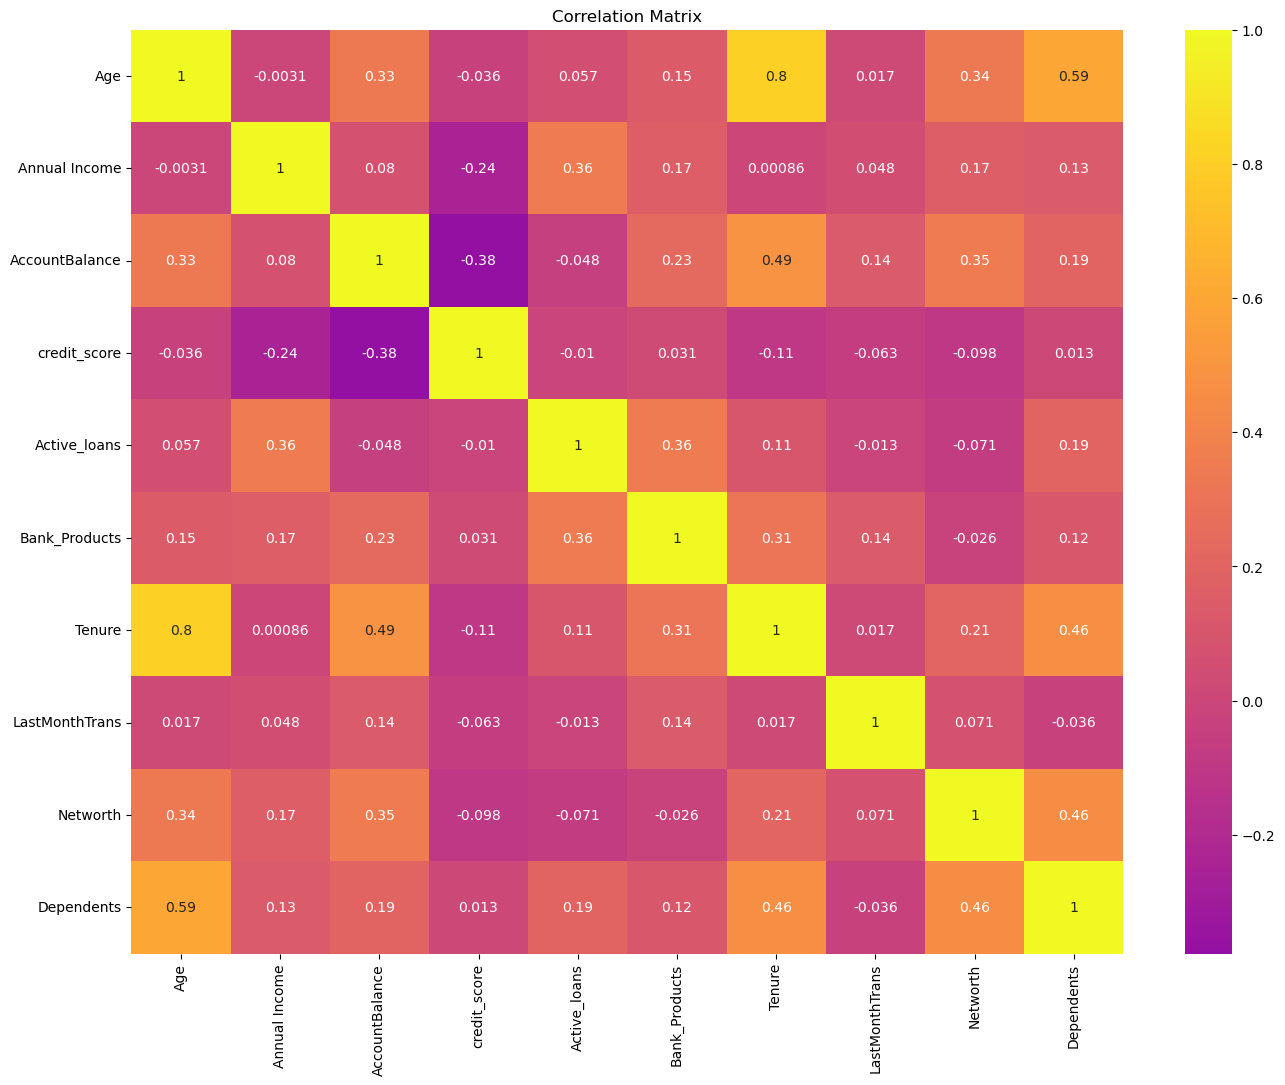

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
df1 = df.select_dtypes(include=['int64', 'float64'])

# Inspect the data types and summary statistics
print(df1.dtypes)
print(df1.describe())

# Optionally handle missing values
df1 = df1.fillna(df1.mean())

# Check for constant columns (if any)
print(df1.std())

# Calculate the correlation matrix
corr_matrix = df1.corr()
print(corr_matrix)

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', center=0)
plt.title('Correlation Matrix')
plt.show()


# Encoding

In [133]:
df

,Age,Annual Income,Occupation,AccountBalance,credit_score,Gender,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Married,Dependents
0,45,500100,Salaried,50000,760.0,Male,Graduate,2,5,No,11,33,100000,yes,2
1,49,480000,Salaried,30000,750.0,Male,Graduate,2,3,Yes,10,23,800087,yes,3
2,37,480000,Salaried,10000,710.0,Male,Under Graduate,0,2,Yes,6,34,30000,yes,4
3,21,240000,Salaried,5000,700.0,Male,Under Graduate,1,2,No,2,25,650000,no,0
4,42,35000,Housewife,12500,800.0,Female,Graduate,1,2,Yes,8,56,10000,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,Salaried,200000,750.0,Male,Post Graduate,1,6,Yes,14,61,400000,yes,2
97,55,600000,Other,100000,789.0,Male,Under Graduate,2,3,No,19,24,3700000,yes,3
98,28,120000,Housewife,20000,786.0,Female,Under Graduate,0,1,No,6,65,50599,yes,1
99,54,240000,Other,5000,768.0,Female,Under Graduate,1,2,No,17,34,134000,yes,3


In [134]:
from sklearn.preprocessing import OneHotEncoder

In [135]:
columns_to_encode = ['Occupation', 'Gender','Married']

# Initialize the OneHotEncoder
encoder1 = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the data
encoded_array = encoder1.fit_transform(df[columns_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_array, columns=encoder1.get_feature_names_out(columns_to_encode))

# Reset index to ensure proper concatenation
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame (excluding the encoded columns) with the encoded DataFrame
df_final = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)


In [136]:
df_final

,Age,Annual Income,AccountBalance,credit_score,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Dependents,Occupation_Housewife,Occupation_Other,Occupation_Salaried,Gender_Male,Married_yes
0,45,500100,50000,760.0,Graduate,2,5,No,11,33,100000,2,0.0,0.0,1.0,1.0,1.0
1,49,480000,30000,750.0,Graduate,2,3,Yes,10,23,800087,3,0.0,0.0,1.0,1.0,1.0
2,37,480000,10000,710.0,Under Graduate,0,2,Yes,6,34,30000,4,0.0,0.0,1.0,1.0,1.0
3,21,240000,5000,700.0,Under Graduate,1,2,No,2,25,650000,0,0.0,0.0,1.0,1.0,0.0
4,42,35000,12500,800.0,Graduate,1,2,Yes,8,56,10000,3,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,200000,750.0,Post Graduate,1,6,Yes,14,61,400000,2,0.0,0.0,1.0,1.0,1.0
97,55,600000,100000,789.0,Under Graduate,2,3,No,19,24,3700000,3,0.0,1.0,0.0,1.0,1.0
98,28,120000,20000,786.0,Under Graduate,0,1,No,6,65,50599,1,1.0,0.0,0.0,0.0,1.0
99,54,240000,5000,768.0,Under Graduate,1,2,No,17,34,134000,3,0.0,1.0,0.0,0.0,1.0


In [137]:
df_final['Fixed Deposit'] = df['Fixed Deposit'].map({'Yes': 1, 'No': 0})

In [138]:
df_final.isnull().sum()

Age                     0
Annual Income           0
AccountBalance          0
credit_score            0
Education               0
Active_loans            0
Bank_Products           0
Fixed Deposit           0
Tenure                  0
LastMonthTrans          0
Networth                0
Dependents              0
Occupation_Housewife    0
Occupation_Other        0
Occupation_Salaried     0
Gender_Male             0
Married_yes             0
dtype: int64

In [139]:
df_final.dtypes

Age                       int64
Annual Income             int64
AccountBalance            int64
credit_score            float64
Education                object
Active_loans              int64
Bank_Products             int64
Fixed Deposit             int64
Tenure                    int64
LastMonthTrans            int64
Networth                  int64
Dependents                int64
Occupation_Housewife    float64
Occupation_Other        float64
Occupation_Salaried     float64
Gender_Male             float64
Married_yes             float64
dtype: object

In [140]:
from sklearn.preprocessing import OrdinalEncoder

In [141]:
df_final['Education'].unique()


array(['Graduate', 'Under Graduate', 'Post Graduate'], dtype=object)

In [142]:
df_final.shape

(101, 17)

In [143]:
encoder = OrdinalEncoder(categories=[['Under Graduate', 'Graduate', 'Post Graduate']])



In [144]:
df_final['education'] = encoder.fit_transform(df_final[['Education']])



In [145]:
df_final

,Age,Annual Income,AccountBalance,credit_score,Education,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Dependents,Occupation_Housewife,Occupation_Other,Occupation_Salaried,Gender_Male,Married_yes,education
0,45,500100,50000,760.0,Graduate,2,5,0,11,33,100000,2,0.0,0.0,1.0,1.0,1.0,1.0
1,49,480000,30000,750.0,Graduate,2,3,1,10,23,800087,3,0.0,0.0,1.0,1.0,1.0,1.0
2,37,480000,10000,710.0,Under Graduate,0,2,1,6,34,30000,4,0.0,0.0,1.0,1.0,1.0,0.0
3,21,240000,5000,700.0,Under Graduate,1,2,0,2,25,650000,0,0.0,0.0,1.0,1.0,0.0,0.0
4,42,35000,12500,800.0,Graduate,1,2,1,8,56,10000,3,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,200000,750.0,Post Graduate,1,6,1,14,61,400000,2,0.0,0.0,1.0,1.0,1.0,2.0
97,55,600000,100000,789.0,Under Graduate,2,3,0,19,24,3700000,3,0.0,1.0,0.0,1.0,1.0,0.0
98,28,120000,20000,786.0,Under Graduate,0,1,0,6,65,50599,1,1.0,0.0,0.0,0.0,1.0,0.0
99,54,240000,5000,768.0,Under Graduate,1,2,0,17,34,134000,3,0.0,1.0,0.0,0.0,1.0,0.0


In [146]:
df_final=df_final.drop('Education',axis=1)

In [147]:

df_final

,Age,Annual Income,AccountBalance,credit_score,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,Dependents,Occupation_Housewife,Occupation_Other,Occupation_Salaried,Gender_Male,Married_yes,education
0,45,500100,50000,760.0,2,5,0,11,33,100000,2,0.0,0.0,1.0,1.0,1.0,1.0
1,49,480000,30000,750.0,2,3,1,10,23,800087,3,0.0,0.0,1.0,1.0,1.0,1.0
2,37,480000,10000,710.0,0,2,1,6,34,30000,4,0.0,0.0,1.0,1.0,1.0,0.0
3,21,240000,5000,700.0,1,2,0,2,25,650000,0,0.0,0.0,1.0,1.0,0.0,0.0
4,42,35000,12500,800.0,1,2,1,8,56,10000,3,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,200000,750.0,1,6,1,14,61,400000,2,0.0,0.0,1.0,1.0,1.0,2.0
97,55,600000,100000,789.0,2,3,0,19,24,3700000,3,0.0,1.0,0.0,1.0,1.0,0.0
98,28,120000,20000,786.0,0,1,0,6,65,50599,1,1.0,0.0,0.0,0.0,1.0,0.0
99,54,240000,5000,768.0,1,2,0,17,34,134000,3,0.0,1.0,0.0,0.0,1.0,0.0


In [148]:
df_final.dtypes

Age                       int64
Annual Income             int64
AccountBalance            int64
credit_score            float64
Active_loans              int64
Bank_Products             int64
Fixed Deposit             int64
Tenure                    int64
LastMonthTrans            int64
Networth                  int64
Dependents                int64
Occupation_Housewife    float64
Occupation_Other        float64
Occupation_Salaried     float64
Gender_Male             float64
Married_yes             float64
education               float64
dtype: object

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final)

In [151]:
from sklearn.decomposition import PCA

In [152]:
pca = PCA(n_components=2)  # Number of components you want to keep
pca_result = pca.fit_transform(scaled_data)

In [153]:
pca_df3 = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])


In [154]:
pca_df3

,PC1,PC2
0,0.853322,-0.831018
1,0.963615,-0.756937
2,-0.118741,-0.416235
3,-2.674171,-0.708235
4,-0.463399,-1.152990
...,...,...
96,1.379608,-1.892835
97,0.626636,2.161141
98,-2.126833,-0.747232
99,-0.262049,1.603859


# K-Means

In [155]:
from sklearn.cluster import KMeans

In [156]:
inertia = []
k_values = range(1, 11)  # Test from 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

In [157]:
inertia

[586.3240555012324,
 311.3086918411192,
 212.73404938993286,
 173.10657556201198,
 144.40208349807688,
 102.47479303474492,
 92.48466514526761,
 70.66819644661864,
 55.42022458117249,
 46.8711005756261]

In [158]:
pca_result

array([[ 0.8533218 , -0.8310184 ],
       [ 0.96361473, -0.75693723],
       [-0.11874057, -0.41623523],
       [-2.67417069, -0.70823547],
       [-0.46339858, -1.1529902 ],
       [ 1.25621829, -1.17583145],
       [ 0.5662795 ,  1.5763158 ],
       [ 1.65823421, -0.17742011],
       [-2.68623282,  0.3031628 ],
       [-3.32293819,  0.74773716],
       [-3.66195759,  1.55628964],
       [ 1.92174618,  0.23536307],
       [ 0.6720881 , -0.38143379],
       [ 2.64688949,  0.31403391],
       [-1.66787629, -2.10072755],
       [-1.49130582,  0.39826431],
       [-2.619178  , -0.92374241],
       [-1.80247452, -0.80300348],
       [-3.572696  ,  1.17979149],
       [ 1.65988048, -0.61268962],
       [ 2.43770928,  0.40837534],
       [-1.43703776, -2.2748913 ],
       [ 0.84787761,  0.41021997],
       [ 1.03932421,  0.16802357],
       [ 1.74012529, -0.52416831],
       [ 3.64402614,  1.09326684],
       [-1.55511225,  1.30334414],
       [-2.01405327, -1.10202295],
       [ 2.79478466,

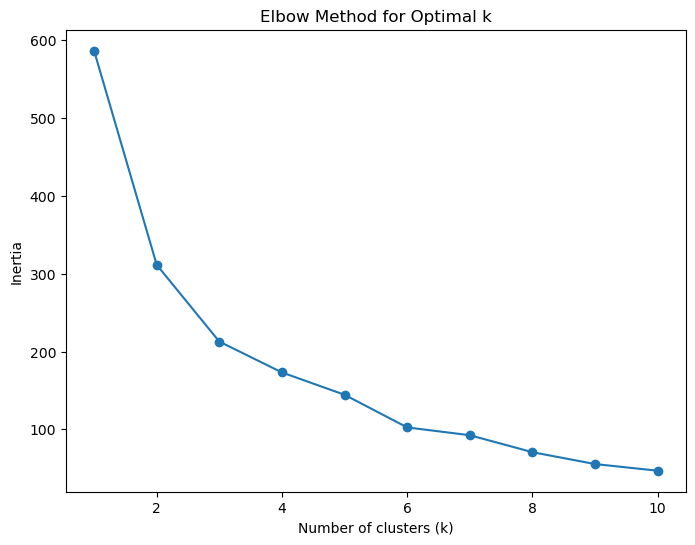

In [159]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [160]:
from sklearn.metrics import silhouette_score
k_values = range(2, 11)  # Start from 2 because silhouette score is not defined for 1 cluster

# Calculate Silhouette Scores
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, clusters)
    silhouette_scores.append(silhouette_avg)


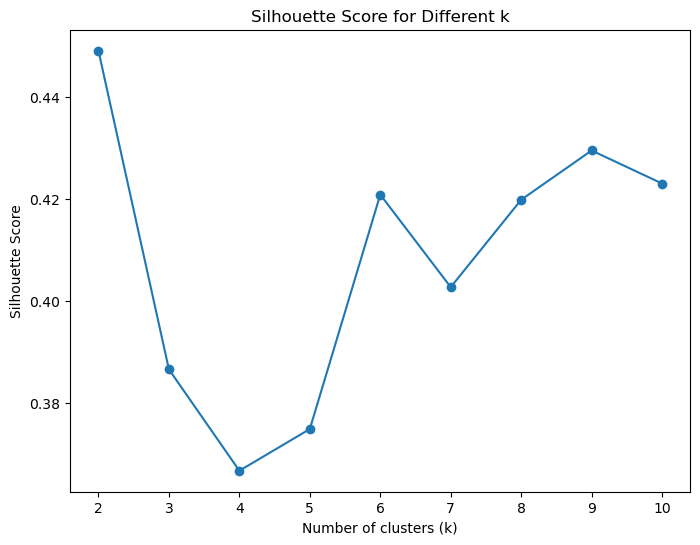

In [161]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [162]:
print("Silhouette Scores:\n", silhouette_scores)

Silhouette Scores:
 [0.4491329950634159, 0.3865908253347761, 0.36669723093177753, 0.3748760735310292, 0.42088818570369735, 0.4027291895822379, 0.41988206488211954, 0.4295510584338925, 0.42306294790044124]


In [163]:
from sklearn.metrics import silhouette_score
from kneed import KneeLocator


In [164]:
knee = KneeLocator(range(1, 11),inertia, curve='convex', direction='decreasing')
optimal_k = knee.elbow

In [165]:
optimal_k

3

In [166]:
kmeans_pca = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
pca_df3['Cluster'] = kmeans_pca.fit_predict(pca_df3)

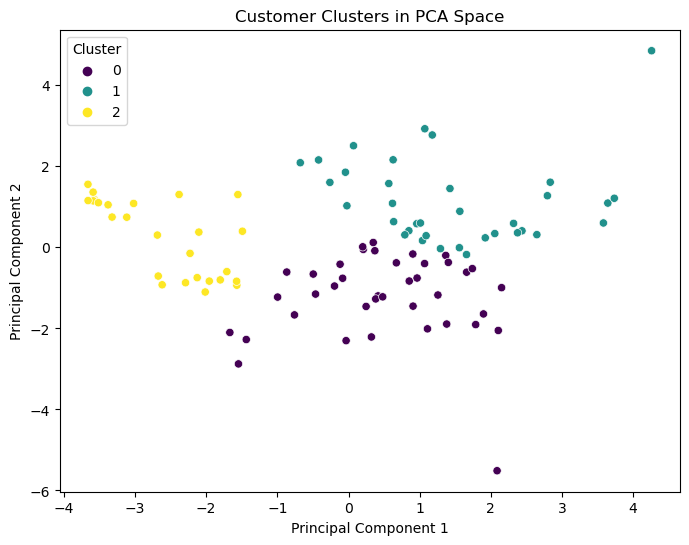

In [167]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df3, palette='viridis')
plt.title('Customer Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [168]:
df_final['Cluster']=pca_df3['Cluster']

In [169]:



cluster_summary = df_final.groupby('Cluster').mean()
print(cluster_summary)

               Age  Annual Income  AccountBalance  credit_score  Active_loans  \
Cluster                                                                         
0        36.333333  921464.102564   205355.589744    681.841406      1.564103   
1        52.142857  608162.228571   474253.685714    644.770018      0.942857   
2        24.185185  253925.925926    50906.259259    667.405578      0.629630   

         Bank_Products  Fixed Deposit     Tenure  LastMonthTrans  \
Cluster                                                            
0             2.743590       0.743590   8.948718       42.179487   
1             2.257143       0.457143  17.028571       37.342857   
2             1.555556       0.333333   3.185185       30.703704   

             Networth  Dependents  Occupation_Housewife  Occupation_Other  \
Cluster                                                                     
0        1.974455e+06    2.974359              0.076923          0.025641   
1        4.332473e+06 

In [170]:
df_reset = df_final.copy()

In [171]:
df_reset=pd.DataFrame(df_reset)

In [172]:
occupation_df = df_reset.melt(id_vars='Cluster', value_vars=['Occupation_Housewife', 'Occupation_Other', 'Occupation_Salaried'], var_name='Occupation', value_name='Percentage')
df_reset['Gender_Female'] = 1 - df_reset['Gender_Male']
gender_df = df_reset.melt(id_vars='Cluster', value_vars=['Gender_Male','Gender_Female'], var_name='Gender', value_name='Percentage')
df_reset['Single'] = 1 - df_reset['Married_yes']
married_df = df_reset.melt(id_vars='Cluster', value_vars=['Married_yes','Single'], var_name='Married', value_name='Percentage')


education_mapping = {0.0: 'Undergraduate', 1.0: 'Graduate', 2.0: 'Post Graduate'}
df_reset['Education_Label'] = df_reset['education'].map(education_mapping)
education_df = df_reset.melt(id_vars='Cluster', value_vars=['Education_Label'], var_name='Education', value_name='Count')


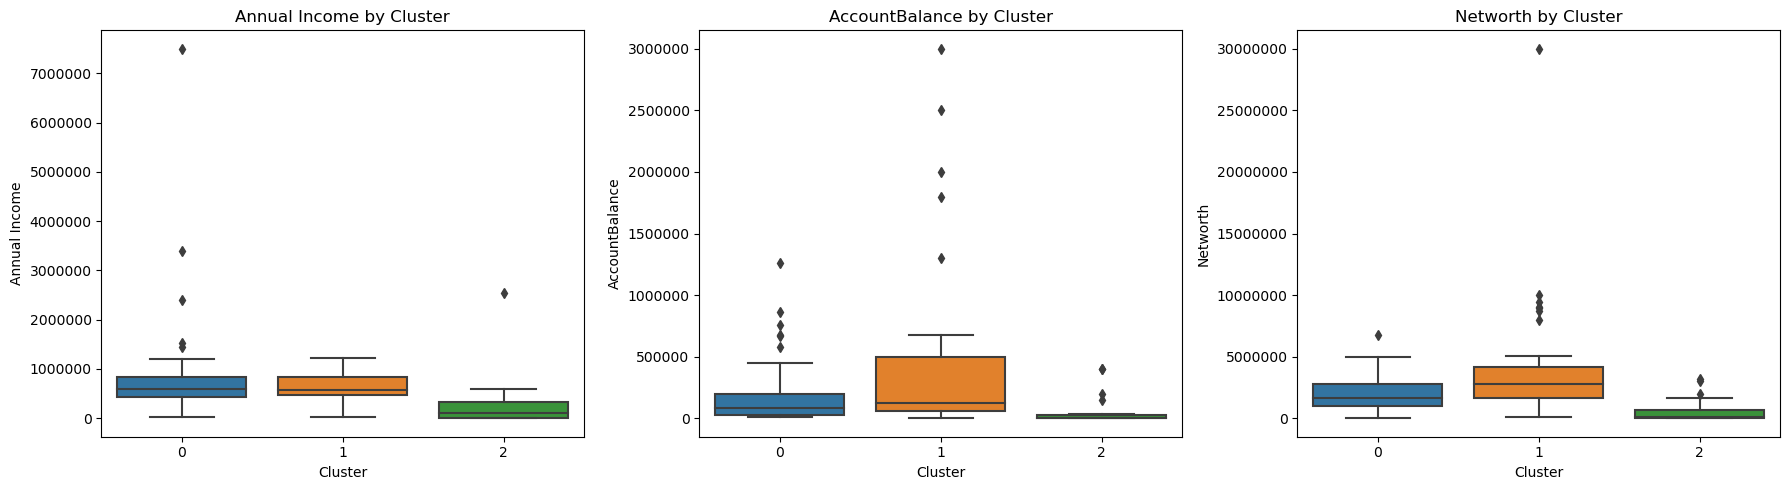

In [173]:
financial_features = ['Annual Income', 'AccountBalance', 'Networth']

plt.figure(figsize=(18, 5))


for i, feature in enumerate(financial_features, 1):
    plt.subplot(1, 3, i)
    plt.ticklabel_format(style='plain')
    #plt.xticks(rotation=45)

    sns.boxplot(x='Cluster', y=feature, data=df_reset)
    plt.title(f'{feature} by Cluster')
plt.tight_layout()

plt.show()

In [174]:
df_reset['Occupation_Business'] = 1 - df_reset[['Occupation_Housewife', 'Occupation_Other', 'Occupation_Salaried']].sum(axis=1)
occupation_df = df_reset[['Cluster', 'Occupation_Housewife', 'Occupation_Other', 'Occupation_Salaried', 'Occupation_Business']]
occupation_df = occupation_df.melt(id_vars='Cluster', var_name='Occupation', value_name='Percentage')

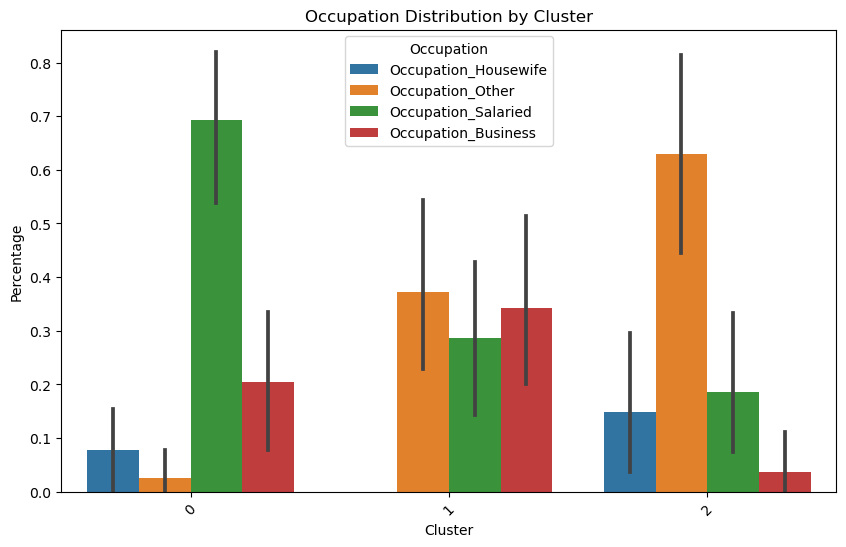

In [175]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Percentage', hue='Occupation', data=occupation_df)
plt.title('Occupation Distribution by Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  
plt.show()

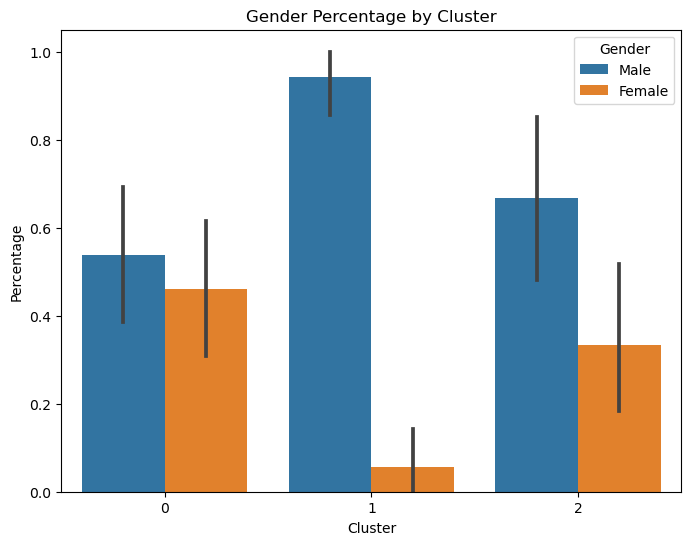

In [176]:
gender_df['Gender'] = gender_df['Gender'].str.replace('Gender_', '')
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Percentage', hue='Gender', data=gender_df)
plt.title('Gender Percentage by Cluster')
plt.ylabel('Percentage')
plt.show()


In [177]:
df_reset['education'].value_counts()


education
0.0    43
1.0    42
2.0    16
Name: count, dtype: int64

In [178]:
print(education_df.head())

   Cluster        Education          Count
0        0  Education_Label       Graduate
1        0  Education_Label       Graduate
2        0  Education_Label  Undergraduate
3        2  Education_Label  Undergraduate
4        0  Education_Label       Graduate


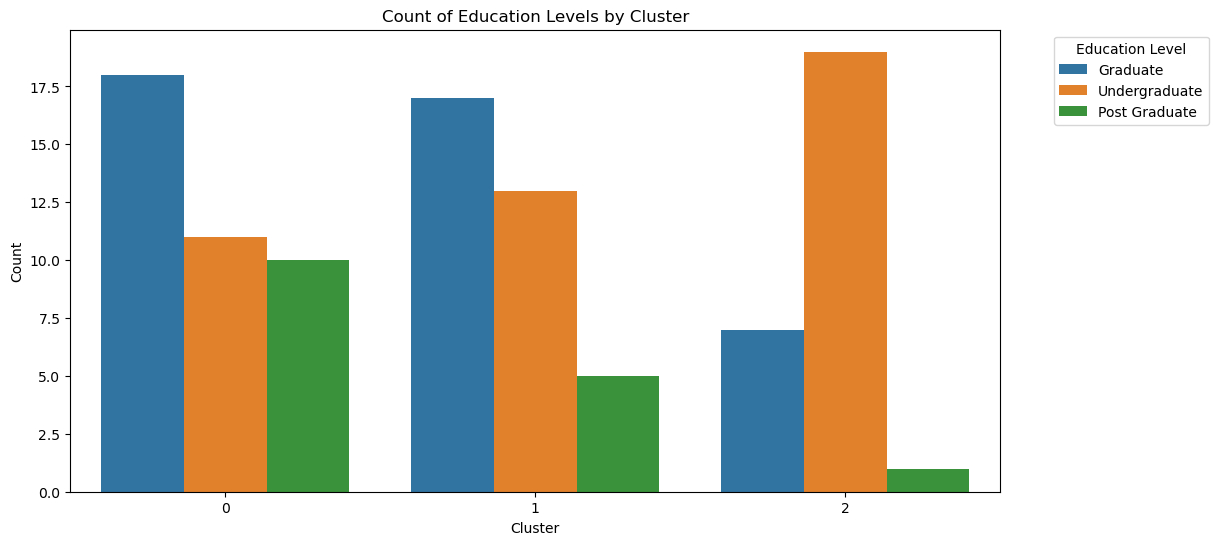

In [179]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Education_Label', data=df_reset)
plt.title('Count of Education Levels by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


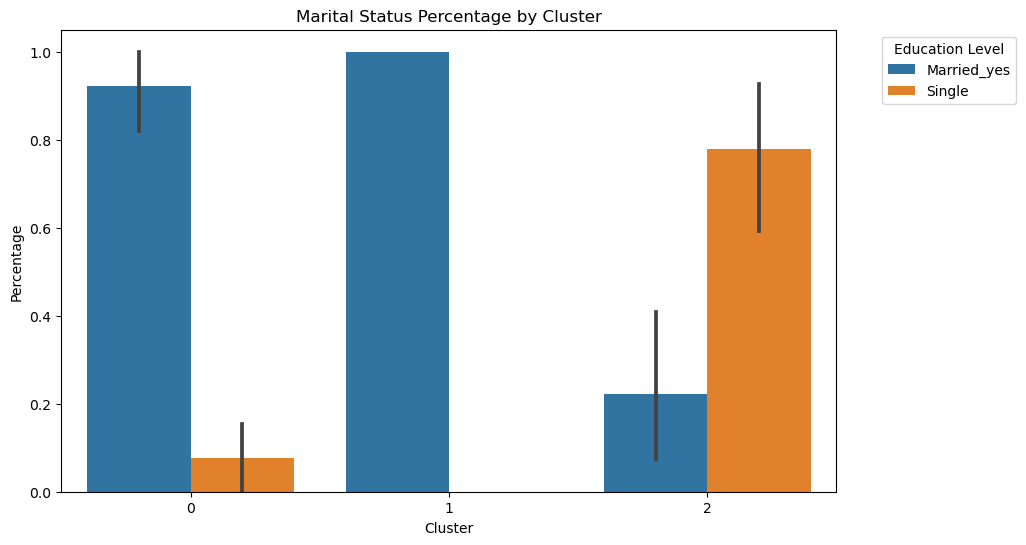

In [180]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Percentage', hue='Married', data=married_df)
plt.title('Marital Status Percentage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

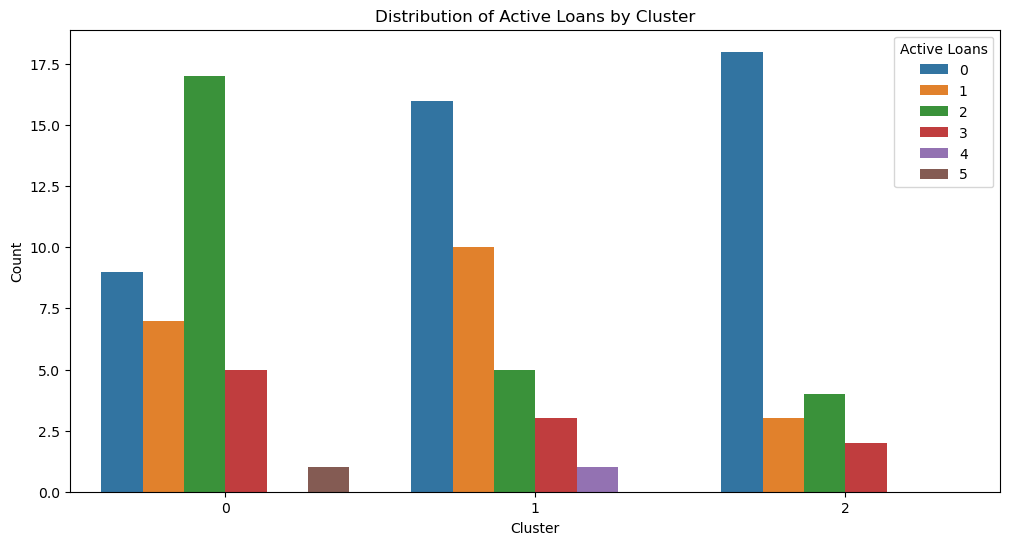

In [181]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Active_loans', data=df_reset)
plt.title('Distribution of Active Loans by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Active Loans')
plt.show()

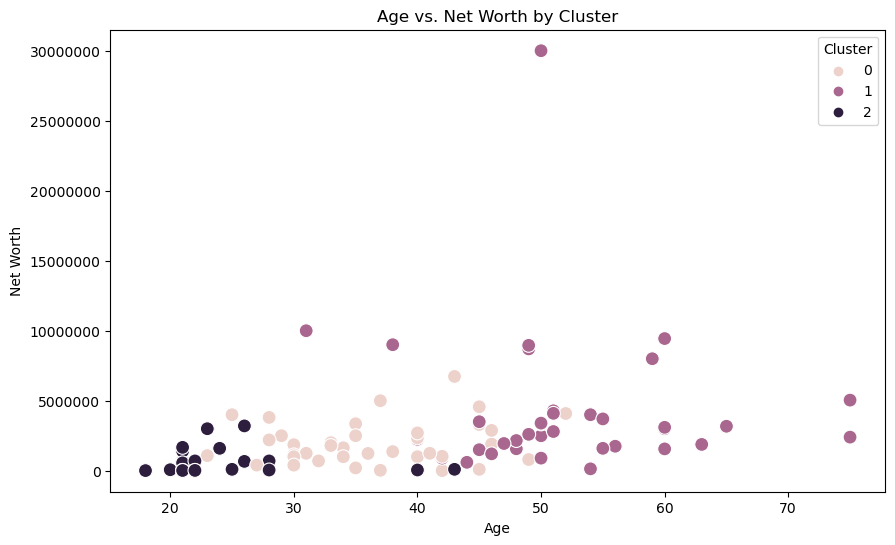

In [182]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Networth', hue='Cluster', data=df_reset, s=100)
plt.ticklabel_format(style='plain')
plt.title('Age vs. Net Worth by Cluster')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.show()

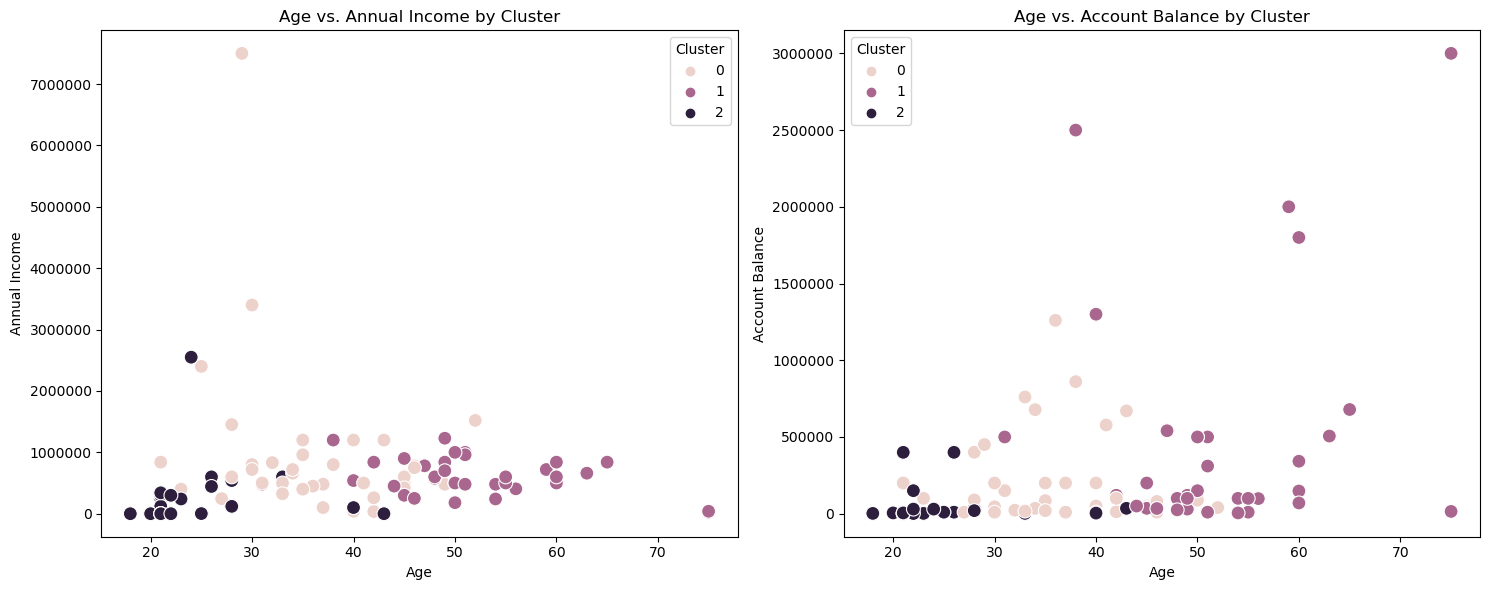

In [183]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) 
sns.scatterplot(x='Age', y='Annual Income', hue='Cluster', data=df_reset, s=100)
plt.ticklabel_format(style='plain')  
plt.title('Age vs. Annual Income by Cluster')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='Age', y='AccountBalance', hue='Cluster', data=df_reset, s=100)
plt.ticklabel_format(style='plain')  # To avoid scientific notation
plt.title('Age vs. Account Balance by Cluster')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.tight_layout()
plt.show()

<Axes: xlabel='Cluster'>

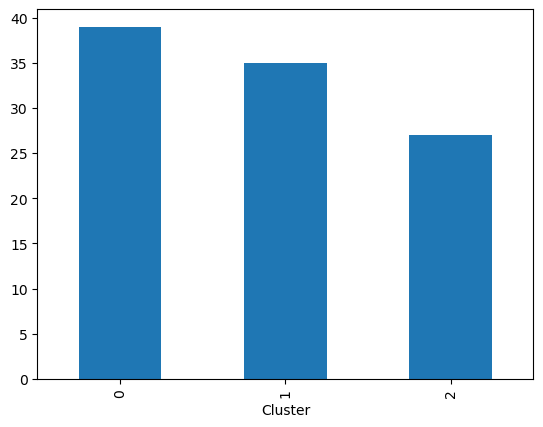

In [184]:
df_final['Cluster'].value_counts().plot(kind='bar')

In [185]:
df_reset

,Age,Annual Income,AccountBalance,credit_score,Active_loans,Bank_Products,Fixed Deposit,Tenure,LastMonthTrans,Networth,...,Occupation_Other,Occupation_Salaried,Gender_Male,Married_yes,education,Cluster,Gender_Female,Single,Education_Label,Occupation_Business
0,45,500100,50000,760.0,2,5,0,11,33,100000,...,0.0,1.0,1.0,1.0,1.0,0,0.0,0.0,Graduate,0.0
1,49,480000,30000,750.0,2,3,1,10,23,800087,...,0.0,1.0,1.0,1.0,1.0,0,0.0,0.0,Graduate,0.0
2,37,480000,10000,710.0,0,2,1,6,34,30000,...,0.0,1.0,1.0,1.0,0.0,0,0.0,0.0,Undergraduate,0.0
3,21,240000,5000,700.0,1,2,0,2,25,650000,...,0.0,1.0,1.0,0.0,0.0,2,0.0,1.0,Undergraduate,0.0
4,42,35000,12500,800.0,1,2,1,8,56,10000,...,0.0,0.0,0.0,1.0,1.0,0,1.0,0.0,Graduate,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,200000,750.0,1,6,1,14,61,400000,...,0.0,1.0,1.0,1.0,2.0,0,0.0,0.0,Post Graduate,0.0
97,55,600000,100000,789.0,2,3,0,19,24,3700000,...,1.0,0.0,1.0,1.0,0.0,1,0.0,0.0,Undergraduate,0.0
98,28,120000,20000,786.0,0,1,0,6,65,50599,...,0.0,0.0,0.0,1.0,0.0,2,1.0,0.0,Undergraduate,0.0
99,54,240000,5000,768.0,1,2,0,17,34,134000,...,1.0,0.0,0.0,1.0,0.0,1,1.0,0.0,Undergraduate,0.0


In [186]:
'''df_final['Cluster'] = clusters

# Plot pair plots
sns.pairplot(df_final, hue='Cluster', palette='viridis', diag_kind='kde')
plt.title('Pair Plot of Features Colored by Cluster')
plt.show()'''

"df_final['Cluster'] = clusters\n\n# Plot pair plots\nsns.pairplot(df_final, hue='Cluster', palette='viridis', diag_kind='kde')\nplt.title('Pair Plot of Features Colored by Cluster')\nplt.show()"

# KNN

In [187]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [188]:
X_train, X_test, y_train, y_test = train_test_split(pca_df3, pca_df3['Cluster'], test_size=0.3, random_state=42)


In [189]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [190]:
y_pred = knn.predict(X_test)

In [191]:
y_pred

array([1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 1], dtype=int32)

In [192]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [193]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [194]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  8  0]
 [ 0  0 13]]


In [195]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean():.2f}')

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.00


In [206]:
X = df_final.drop(columns=['Cluster'])
Y=df_final['Cluster']

In [207]:
'''scaler1=StandardScaler() if you want to apply scaling
#scaler = StandardScaler()
X2 = scaler.fit_transform(X)
X2=pd.DataFrame(X2)'''

'scaler1=StandardScaler() if you want to apply scaling\n#scaler = StandardScaler()\nX2 = scaler.fit_transform(X)\nX2=pd.DataFrame(X2)'

In [212]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.30, random_state=42)


In [213]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=3)

In [214]:
y_pred1 = knn1.predict(X_test1)

In [215]:
accuracy1 = accuracy_score(y_test1, y_pred1)
print(f'Accuracy: {accuracy1:.2f}')

Accuracy: 0.65


In [216]:
print('Classification Report:')
print(classification_report(y_test1, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       0.67      0.50      0.57         8
           2       0.82      0.69      0.75        13

    accuracy                           0.65        31
   macro avg       0.66      0.63      0.63        31
weighted avg       0.68      0.65      0.65        31



In [217]:
df_concat = pd.concat([df1, df_final['Cluster']], axis=1)


In [218]:
df_concat

,Age,Annual Income,AccountBalance,credit_score,Active_loans,Bank_Products,Tenure,LastMonthTrans,Networth,Dependents,Cluster
0,45,500100,50000,760.0,2,5,11,33,100000,2,0
1,49,480000,30000,750.0,2,3,10,23,800087,3,0
2,37,480000,10000,710.0,0,2,6,34,30000,4,0
3,21,240000,5000,700.0,1,2,2,25,650000,0,2
4,42,35000,12500,800.0,1,2,8,56,10000,3,0
...,...,...,...,...,...,...,...,...,...,...,...
96,30,720000,200000,750.0,1,6,14,61,400000,2,0
97,55,600000,100000,789.0,2,3,19,24,3700000,3,1
98,28,120000,20000,786.0,0,1,6,65,50599,1,2
99,54,240000,5000,768.0,1,2,17,34,134000,3,1


In [192]:
df_concat.to_csv('data_with_clusters.csv', index=False)

In [435]:
import pickle

In [436]:
with open('knn2.pkl', 'wb') as file:
    pickle.dump(knn1, file)

In [431]:

with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [432]:
with open('encoder1.pkl', 'wb') as f:
    pickle.dump(encoder1, f)

In [433]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [434]:
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)